<a href="https://colab.research.google.com/github/RaniaPrastyka/Diagnostic-Data-Predictive-Model-Analytics./blob/main/Air_Quality_Forecasting_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
df = pd.DataFrame(data)

# Mengonversi kolom Time menjadi tipe data datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Menggabungkan kolom Date dan Time menjadi satu kolom Datetime
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Pindahkan kolom Datetime ke posisi pertama
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('Datetime')))
df = df[cols]

# Menghapus kolom lama Date dan Time
df = df.drop(['Date', 'Time'], axis=1)

# Menampilkan DataFrame setelah penggabungan
print(df)

                Datetime  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10 18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10 19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10 20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10 21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10 22:00:00     1.6      1272.25        51   6.518224   
...                  ...     ...          ...       ...        ...   
9352 2005-04-04 10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04 11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04 12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04 13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04 14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1023.5 KB


In [ ]:
df.set_index('Datetime', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


In [ ]:
df

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                       
2004-03-10 18:00:00     2.6      1360.00       150  11.881723        1045.50   
2004-03-10 19:00:00     2.0      1292.25       112   9.397165         954.75   
2004-03-10 20:00:00     2.2      1402.00        88   8.997817         939.25   
2004-03-10 21:00:00     2.2      1375.50        80   9.228796         948.25   
2004-03-10 22:00:00     1.6      1272.25        51   6.518224         835.50   
...                     ...          ...       ...        ...            ...   
2005-04-04 10:00:00     3.1      1314.25      -200  13.529605        1101.25   
2005-04-04 11:00:00     2.4      1162.50      -200  11.355157        1027.00   
2005-04-04 12:00:00     2.4      1142.00      -200  12.374538        1062.50   
2005-04-04 13:00:00     2.1      1002.50      -200   9.547187         960.50   
2005-04-04 14:00:00     2.2      1070.75      -200  11.932060        1047.25   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00    166.0       1056.25    113.0       1692.00   
2004-03-10 19:00:00    103.0       1173.75     92.0       1558.75   
2004-03-10 20:00:00    131.0       1140.00    114.0       1554.50   
2004-03-10 21:00:00    172.0       1092.00    122.0       1583.75   
2004-03-10 22:00:00    131.0       1205.00    116.0       1490.00   
...                      ...           ...      ...           ...   
2005-04-04 10:00:00    471.7        538.50    189.8       1374.25   
2005-04-04 11:00:00    353.3        603.75    179.2       1263.50   
2005-04-04 12:00:00    293.0        603.25    174.7       1240.75   
2005-04-04 13:00:00    234.5        701.50    155.7       1041.00   
2005-04-04 14:00:00    265.2        654.00    167.7       1128.50   

                     PT08.S5(O3)       T         RH        AH  
Datetime                                                       
2004-03-10 18:00:00      1267.50  13.600  48.875001  0.757754  
2004-03-10 19:00:00       972.25  13.300  47.700000  0.725487  
2004-03-10 20:00:00      1074.00  11.900  53.975000  0.750239  
2004-03-10 21:00:00      1203.25  11.000  60.000000  0.786713  
2004-03-10 22:00:00      1110.00  11.150  59.575001  0.788794  
...                          ...     ...        ...       ...  
2005-04-04 10:00:00      1728.50  21.850  29.250000  0.756824  
2005-04-04 11:00:00      1269.00  24.325  23.725000  0.711864  
2005-04-04 12:00:00      1092.00  26.900  18.350000  0.640649  
2005-04-04 13:00:00       769.75  28.325  13.550000  0.513866  
2005-04-04 14:00:00       816.00  28.500  13.125000  0.502804  

[9357 rows x 13 columns]

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.750000   699.750000   
50%     141.000000    794.250000    96.000000   1445.500000   942.000000   
75%     284.200000    960.250000   133.000000   1662.000000  1255.250000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.776600    39.483611    -6.837604  
std      43.203438    51.215645    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.950000    34.050000     0.692275  
50%      17.200000    48.550000     0.976823  
75%      24.075000    61.875000     1.296223  
max      44.600000    88.725000     2.231036

**PENGARUH BULAN TERHADAP KUALITAS UDARA**


               CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                   
2004-03-31  -4.847647  1222.685784   96.554902   9.935104     935.540686   
2004-04-30 -60.916111  1111.609954  120.938889   2.500562     905.970139   
2004-05-31 -39.316532  1052.532370 -199.361559   6.263190     929.319444   
2004-06-30 -19.411667   956.241435 -200.000000  -0.519794     904.700694   
2004-07-31 -48.661290  1044.621192 -200.000000  10.315220     969.761089   
2004-08-31 -70.953495   903.146729 -200.000000  -6.639981     769.968862   
2004-09-30 -43.884306  1049.415394 -200.000000   6.266196     963.527199   
2004-10-31 -92.915591  1182.934140 -200.000000  13.237625    1056.619512   
2004-11-30  -8.856389  1132.038773 -200.000000  12.512374    1011.080093   
2004-12-31 -25.590323   948.593974 -200.000000 -13.027542     795.069444   
2005-01-31 -16.339651  1003.352599 -200.000000  -8.111964     802.123208   
2005-02-28  

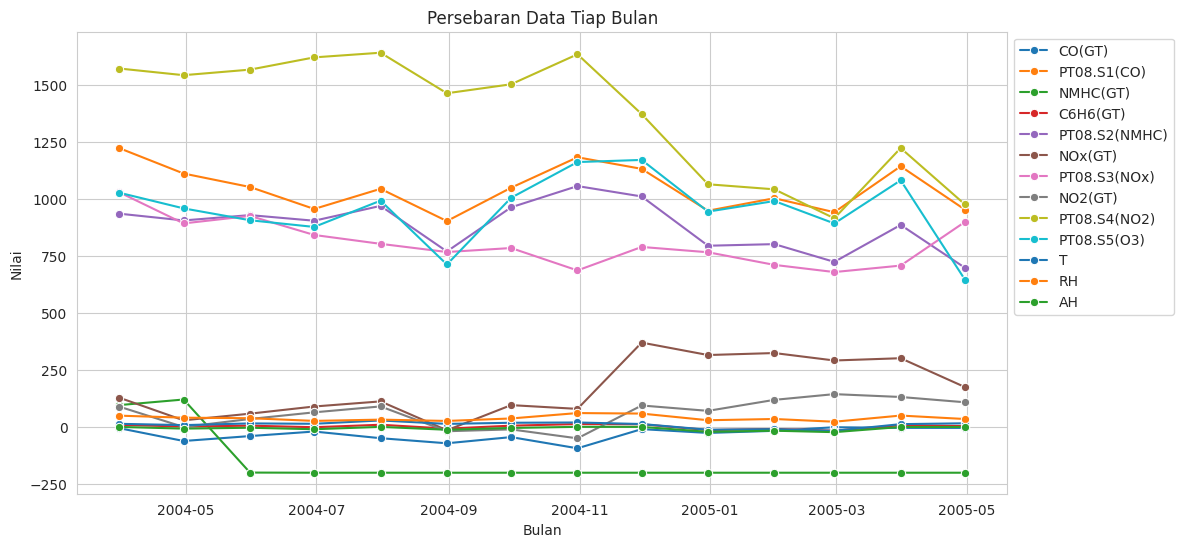

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melihat persebaran data tiap bulan
df_resampled = df.resample('M').mean()  # Menggunakan mean untuk contoh, bisa disesuaikan
print(df_resampled)

# Plot persebaran data tiap bulan
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
for column in df.columns:
    sns.lineplot(data=df_resampled, x=df_resampled.index, y=column, label=column, marker='o')

plt.title('Persebaran Data Tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()
plt.legend(bbox_to_anchor=(1., 1), loc='upper left')
plt.show()

               CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                   
2004-03-10   1.966667  1316.500000   86.500000   8.460790     912.250000   
2004-03-11  -6.187500  1244.062500  104.500000   7.989058     851.802083   
2004-03-12 -14.095833  1281.562500  141.500000  12.129509    1008.229167   
2004-03-13  -5.750000  1330.555556  139.250000  10.922887     992.822917   
2004-03-14  -5.966667  1360.927083  116.958333   9.631442     943.854167   
...               ...          ...         ...        ...            ...   
2005-03-31   1.387500  1007.989583 -200.000000   5.226496     749.302083   
2005-04-01  -7.270833   903.142361 -200.000000   3.416610     662.871528   
2005-04-02   0.854167   890.895833 -200.000000   2.527522     616.197917   
2005-04-03   1.141667   981.152778 -200.000000   4.318307     714.579861   
2005-04-04 -11.393333  1090.400000 -200.000000   8.435233     862.133333   

           

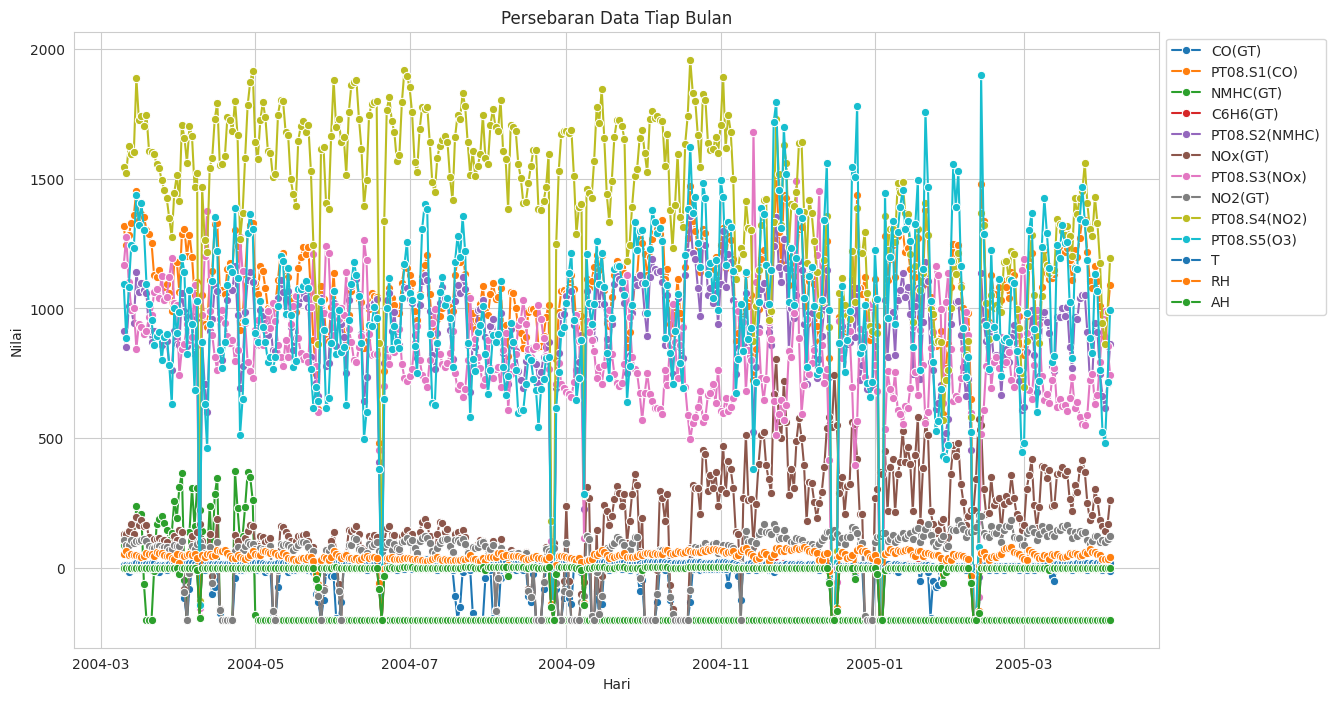

In [ ]:
# Melihat persebaran data tiap Hari
df_resampled = df.resample('D').mean()  # Menggunakan mean untuk contoh, bisa disesuaikan
print(df_resampled)

# Plot persebaran data tiap Hari
sns.set_style('whitegrid')
plt.figure(figsize=(14, 8))
for column in df.columns:
    sns.lineplot(data=df_resampled, x=df_resampled.index, y=column, label=column, marker='o')

plt.title('Persebaran Data Tiap Bulan')
plt.xlabel('Hari')
plt.ylabel('Nilai')
plt.legend()
plt.legend(bbox_to_anchor=(1., 1), loc='upper left')
plt.show()

               CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                   
2004-03-31  -4.847647  1222.685784   96.554902   9.935104     935.540686   
2004-04-30 -60.916111  1111.609954  120.938889   2.500562     905.970139   
2004-05-31 -39.316532  1052.532370 -199.361559   6.263190     929.319444   
2004-06-30 -19.411667   956.241435 -200.000000  -0.519794     904.700694   
2004-07-31 -48.661290  1044.621192 -200.000000  10.315220     969.761089   
2004-08-31 -70.953495   903.146729 -200.000000  -6.639981     769.968862   
2004-09-30 -43.884306  1049.415394 -200.000000   6.266196     963.527199   
2004-10-31 -92.915591  1182.934140 -200.000000  13.237625    1056.619512   
2004-11-30  -8.856389  1132.038773 -200.000000  12.512374    1011.080093   
2004-12-31 -25.590323   948.593974 -200.000000 -13.027542     795.069444   
2005-01-31 -16.339651  1003.352599 -200.000000  -8.111964     802.123208   
2005-02-28  

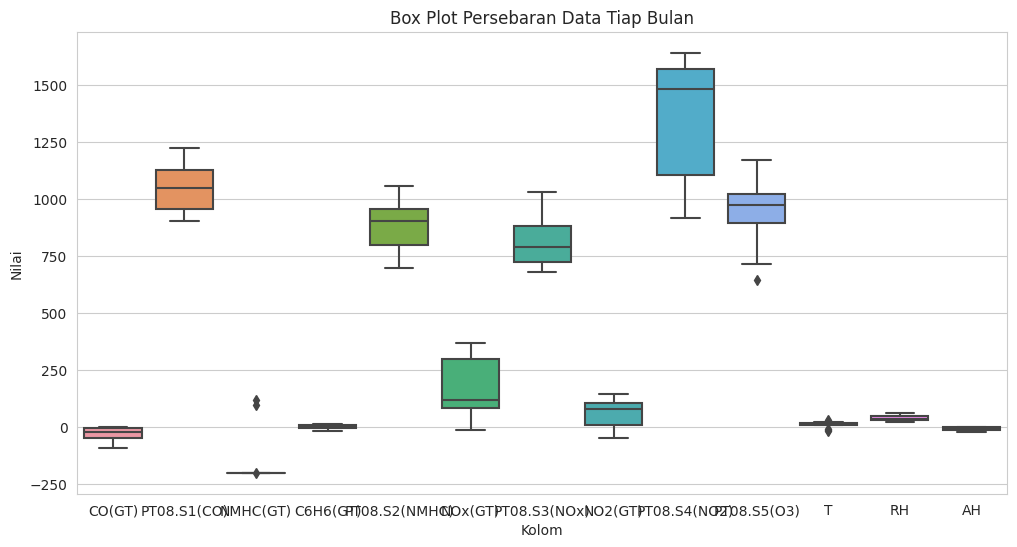

In [ ]:
# Melihat persebaran data tiap bulan
df_resampled = df.resample('M').mean()
print(df_resampled)

# Plot box plot tiap kolom
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_resampled)
plt.title('Box Plot Persebaran Data Tiap Bulan')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.show()

               CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                   
2004-03-10   1.966667  1316.500000   86.500000   8.460790     912.250000   
2004-03-11  -6.187500  1244.062500  104.500000   7.989058     851.802083   
2004-03-12 -14.095833  1281.562500  141.500000  12.129509    1008.229167   
2004-03-13  -5.750000  1330.555556  139.250000  10.922887     992.822917   
2004-03-14  -5.966667  1360.927083  116.958333   9.631442     943.854167   
...               ...          ...         ...        ...            ...   
2005-03-31   1.387500  1007.989583 -200.000000   5.226496     749.302083   
2005-04-01  -7.270833   903.142361 -200.000000   3.416610     662.871528   
2005-04-02   0.854167   890.895833 -200.000000   2.527522     616.197917   
2005-04-03   1.141667   981.152778 -200.000000   4.318307     714.579861   
2005-04-04 -11.393333  1090.400000 -200.000000   8.435233     862.133333   

           

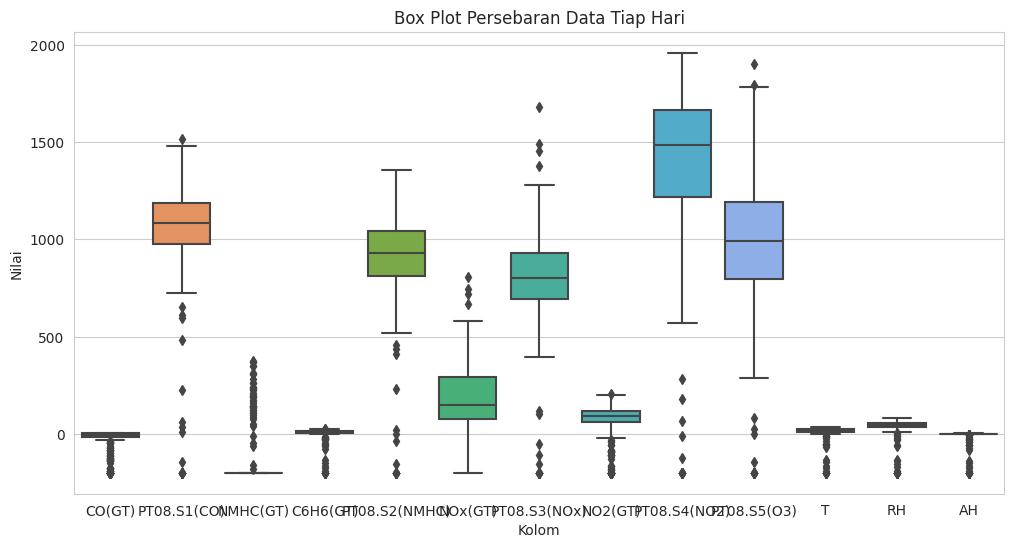

In [ ]:
# Melihat persebaran data tiap Hari
df_resampled = df.resample('D').mean()  # Menggunakan mean untuk contoh, bisa disesuaikan
print(df_resampled)

# Plot box plot tiap kolom
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_resampled)
plt.title('Box Plot Persebaran Data Tiap Hari')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.show()

                     CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                       
2004-03-10 18:00:00     2.6      1360.00     150.0  11.881723        1045.50   
2004-03-10 19:00:00     2.0      1292.25     112.0   9.397165         954.75   
2004-03-10 20:00:00     2.2      1402.00      88.0   8.997817         939.25   
2004-03-10 21:00:00     2.2      1375.50      80.0   9.228796         948.25   
2004-03-10 22:00:00     1.6      1272.25      51.0   6.518224         835.50   
...                     ...          ...       ...        ...            ...   
2005-04-04 10:00:00     3.1      1314.25    -200.0  13.529605        1101.25   
2005-04-04 11:00:00     2.4      1162.50    -200.0  11.355157        1027.00   
2005-04-04 12:00:00     2.4      1142.00    -200.0  12.374538        1062.50   
2005-04-04 13:00:00     2.1      1002.50    -200.0   9.547187         960.50   
2005-04-04 14:00:00     2.2      1070.75

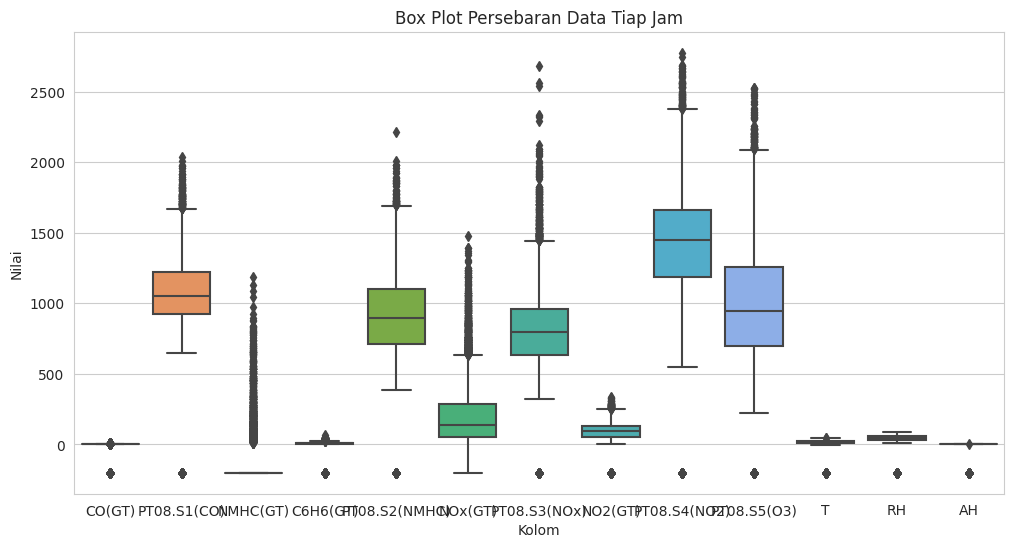

In [ ]:
# Melihat persebaran data tiap Jam
df_resampled = df.resample('H').mean()  # Menggunakan mean untuk contoh, bisa disesuaikan
print(df_resampled)

# Plot box plot tiap kolom
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_resampled)
plt.title('Box Plot Persebaran Data Tiap Jam')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.show()

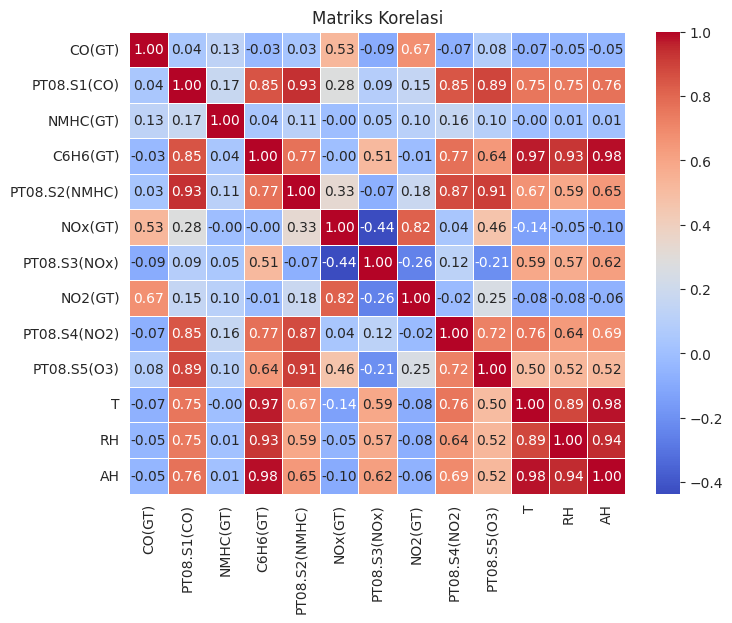

In [ ]:
# Melihat matriks korelasi
correlation_matrix = df.corr()

# Plot heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
# Melihat matriks korelasi dalam bentuk tabel
correlation_matrix = df.corr()
print(correlation_matrix)

                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.041415  0.128351 -0.031377       0.029939   
PT08.S1(CO)    0.041415     1.000000  0.170009  0.852659       0.933101   
NMHC(GT)       0.128351     0.170009  1.000000  0.037329       0.110097   
C6H6(GT)      -0.031377     0.852659  0.037329  1.000000       0.767401   
PT08.S2(NMHC)  0.029939     0.933101  0.110097  0.767401       1.000000   
NOx(GT)        0.526450     0.278029 -0.004413 -0.001163       0.331331   
PT08.S3(NOx)  -0.089981     0.086931  0.048832  0.512154      -0.073748   
NO2(GT)        0.671140     0.154058  0.103345 -0.010971       0.176569   
PT08.S4(NO2)  -0.073721     0.845133  0.162689  0.774649       0.874761   
PT08.S5(O3)    0.080316     0.892436  0.101189  0.641306       0.909909   
T             -0.068952     0.754806 -0.000008  0.971370       0.668984   
RH            -0.048231     0.745344  0.008288  0.925068       0.585775   
AH            -0.045892  

In [ ]:
# Mencari nilai korelasi tertinggi untuk setiap kolom
max_correlations = df.corr().abs().apply(lambda x: x[x < 1].idxmax(), axis=1)

# Menampilkan hasil
for column, max_corr_column in max_correlations.items():
    max_corr_value = df.corr().loc[column, max_corr_column]
    print(f"Kolom '{column}' memiliki Korelasi Tertinggi dengan '{max_corr_column}' sebesar {max_corr_value:.2f}")

Kolom 'CO(GT)' memiliki Korelasi Tertinggi dengan 'NO2(GT)' sebesar 0.67
Kolom 'PT08.S1(CO)' memiliki Korelasi Tertinggi dengan 'PT08.S2(NMHC)' sebesar 0.93
Kolom 'NMHC(GT)' memiliki Korelasi Tertinggi dengan 'PT08.S1(CO)' sebesar 0.17
Kolom 'C6H6(GT)' memiliki Korelasi Tertinggi dengan 'AH' sebesar 0.98
Kolom 'PT08.S2(NMHC)' memiliki Korelasi Tertinggi dengan 'PT08.S1(CO)' sebesar 0.93
Kolom 'NOx(GT)' memiliki Korelasi Tertinggi dengan 'NO2(GT)' sebesar 0.82
Kolom 'PT08.S3(NOx)' memiliki Korelasi Tertinggi dengan 'AH' sebesar 0.62
Kolom 'NO2(GT)' memiliki Korelasi Tertinggi dengan 'NOx(GT)' sebesar 0.82
Kolom 'PT08.S4(NO2)' memiliki Korelasi Tertinggi dengan 'PT08.S2(NMHC)' sebesar 0.87
Kolom 'PT08.S5(O3)' memiliki Korelasi Tertinggi dengan 'PT08.S2(NMHC)' sebesar 0.91
Kolom 'T' memiliki Korelasi Tertinggi dengan 'AH' sebesar 0.98
Kolom 'RH' memiliki Korelasi Tertinggi dengan 'AH' sebesar 0.94
Kolom 'AH' memiliki Korelasi Tertinggi dengan 'C6H6(GT)' sebesar 0.98


In [ ]:
df

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                       
2004-03-10 18:00:00     2.6      1360.00       150  11.881723        1045.50   
2004-03-10 19:00:00     2.0      1292.25       112   9.397165         954.75   
2004-03-10 20:00:00     2.2      1402.00        88   8.997817         939.25   
2004-03-10 21:00:00     2.2      1375.50        80   9.228796         948.25   
2004-03-10 22:00:00     1.6      1272.25        51   6.518224         835.50   
...                     ...          ...       ...        ...            ...   
2005-04-04 10:00:00     3.1      1314.25      -200  13.529605        1101.25   
2005-04-04 11:00:00     2.4      1162.50      -200  11.355157        1027.00   
2005-04-04 12:00:00     2.4      1142.00      -200  12.374538        1062.50   
2005-04-04 13:00:00     2.1      1002.50      -200   9.547187         960.50   
2005-04-04 14:00:00     2.2      1070.75      -200  11.932060        1047.25   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00    166.0       1056.25    113.0       1692.00   
2004-03-10 19:00:00    103.0       1173.75     92.0       1558.75   
2004-03-10 20:00:00    131.0       1140.00    114.0       1554.50   
2004-03-10 21:00:00    172.0       1092.00    122.0       1583.75   
2004-03-10 22:00:00    131.0       1205.00    116.0       1490.00   
...                      ...           ...      ...           ...   
2005-04-04 10:00:00    471.7        538.50    189.8       1374.25   
2005-04-04 11:00:00    353.3        603.75    179.2       1263.50   
2005-04-04 12:00:00    293.0        603.25    174.7       1240.75   
2005-04-04 13:00:00    234.5        701.50    155.7       1041.00   
2005-04-04 14:00:00    265.2        654.00    167.7       1128.50   

                     PT08.S5(O3)       T         RH        AH  
Datetime                                                       
2004-03-10 18:00:00      1267.50  13.600  48.875001  0.757754  
2004-03-10 19:00:00       972.25  13.300  47.700000  0.725487  
2004-03-10 20:00:00      1074.00  11.900  53.975000  0.750239  
2004-03-10 21:00:00      1203.25  11.000  60.000000  0.786713  
2004-03-10 22:00:00      1110.00  11.150  59.575001  0.788794  
...                          ...     ...        ...       ...  
2005-04-04 10:00:00      1728.50  21.850  29.250000  0.756824  
2005-04-04 11:00:00      1269.00  24.325  23.725000  0.711864  
2005-04-04 12:00:00      1092.00  26.900  18.350000  0.640649  
2005-04-04 13:00:00       769.75  28.325  13.550000  0.513866  
2005-04-04 14:00:00       816.00  28.500  13.125000  0.502804  

[9357 rows x 13 columns]

In [ ]:
# Menampilkan data yang memiliki nilai null
null_data = df[df.isnull().any(axis=1)]
print("Data dengan Nilai Null:")
print(null_data)

Data dengan Nilai Null:
Empty DataFrame
Columns: [CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []


In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.750000   699.750000   
50%     141.000000    794.250000    96.000000   1445.500000   942.000000   
75%     284.200000    960.250000   133.000000   1662.000000  1255.250000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.776600    39.483611    -6.837604  
std      43.203438    51.215645    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.950000    34.050000     0.692275  
50%      17.200000    48.550000     0.976823  
75%      24.075000    61.875000     1.296223  
max      44.600000    88.725000     2.231036

In [ ]:
# Split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout

# split dataset to train and test
total_dataset = len(df)
df_train = df[:int(total_dataset*0.76)]
df_test = df[int(total_dataset*0.76):total_dataset]

# scaled
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.fit_transform(df_test)

print('Data for train:', df_train.shape)
print('Total day for train:', df_train.shape[0]/24)
print('\nData for test:', df_test.shape)
print('Total day for test:', df_test.shape[0]/24)

Data for train: (7111, 13)
Total day for train: 296.2916666666667

Data for test: (2246, 13)
Total day for test: 93.58333333333333


In [ ]:
# Choose a number of time steps
# n_steps_in history data for predict n_steps_out forecast data
n_steps_in, n_steps_out = 6, 3

# Convert into input/output
x_train, y_train = split_sequences(df_train_scaled, n_steps_in, n_steps_out)
x_test, y_test = split_sequences(df_test_scaled, n_steps_in, n_steps_out)

# The dataset knows the number of features, e.g. 2
n_features = x_train.shape[2]

In [ ]:
# Look at the x_train structure
print('Data input structure for training')
print(x_train[0])

print('\nData output structure for validation')
print(y_train[0])

Data input structure for training
[[0.95611137 0.69650631 0.25197984 0.80336899 0.51594863 0.2179869
  0.43578181 0.64139344 0.63596639 0.53897714 0.87326247 0.86197939
  0.99271486]
 [0.95327985 0.66625739 0.22462203 0.79394856 0.47835543 0.18046456
  0.4765415  0.59836066 0.59117647 0.43053898 0.87203598 0.85790977
  0.99255531]
 [0.95422369 0.7152584  0.20734341 0.79243439 0.47193455 0.19714116
  0.46483393 0.64344262 0.5897479  0.46790928 0.86631235 0.87964326
  0.9926777 ]
 [0.95422369 0.70342672 0.20158387 0.79331017 0.4756628  0.22156045
  0.44818316 0.65983607 0.59957983 0.51537967 0.86263287 0.90051087
  0.99285805]
 [0.95139217 0.65732783 0.18070554 0.78303279 0.42895609 0.19714116
  0.48738184 0.64754098 0.56806723 0.48113121 0.86324612 0.89903888
  0.99286835]
 [0.94950448 0.62373033 0.17134629 0.77629433 0.39364126 0.17212627
  0.53299801 0.60655738 0.53546218 0.42209164 0.86334832 0.89765348
  0.99284846]]

Data output structure for validation
[[0.94950448 0.61837259 0.16

In [ ]:
print('Total features:', n_features)
print('Total train data:', x_train.shape)
print('Total validation train data:', y_train.shape)
print('Total test data:', x_test.shape)
print('Total validation test data:', y_test.shape)

Total features: 13
Total train data: (7103, 6, 13)
Total validation train data: (7103, 3, 13)
Total test data: (2238, 6, 13)
Total validation test data: (2238, 3, 13)


# **TRAIN**

In [ ]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               171200    
                                                                 
 repeat_vector_1 (RepeatVec  (None, 3, 200)            0         
 tor)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 3, 200)            320800    
                                                                 
 time_distributed_1 (TimeDi  (None, 3, 13)             2613      
 stributed)                                                      
                                                                 
Total params: 494613 (1.89 MB)
Trainable params: 494613 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit model
epoch = 50

model.compile(optimizer='adam', loss='mse',
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))

Epoch 1/50
222/222 [==============================] - 10s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.1163 - val_loss: 0.0144 - val_mean_absolute_error: 0.0751
Epoch 2/50
222/222 [==============================] - 6s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0625 - val_loss: 0.0130 - val_mean_absolute_error: 0.0698
Epoch 3/50
222/222 [==============================] - 7s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0564 - val_loss: 0.0115 - val_mean_absolute_error: 0.0647
Epoch 4/50
222/222 [==============================] - 6s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0544 - val_loss: 0.0117 - val_mean_absolute_error: 0.0660
Epoch 5/50
222/222 [==============================] - 7s 30ms/step - loss: 0.0093 - mean_absolute_error: 0.0522 - val_loss: 0.0122 - val_mean_absolute_error: 0.0707
Epoch 6/50
222/222 [==============================] - 6s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0514 - val_loss: 0.0108 - val_mean_absolute_error: 0.0593
Epoch 7/5

In [ ]:
predictions = model.predict_generator(x_test)
print(predictions.shape)
print(y_test.shape)

<ipython-input-196-cb2bd3e4ae3a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(x_test)


(2238, 3, 13)
(2238, 3, 13)


In [ ]:
# reshape according to predictions shape
predictions = np.reshape(predictions, (2238*3, 13))
real = np.reshape(y_test, (2238*3, 13))

# rescale predictions
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real = pd.DataFrame(real)
real = scaler.inverse_transform(real)
real = pd.DataFrame(real)

print(predictions.shape)
print(real.shape)

(6714, 13)
(6714, 13)


In [ ]:
predictions

0            1           2         3            4           5   \
0    -1.269367  1022.138611 -199.993484 -7.355859   726.375000  161.367493   
1    -2.195786  1076.568481 -199.993942 -3.176181   783.908447  214.618378   
2    -0.825987  1108.164551 -199.996490 -2.427495   828.209839  257.958435   
3    -0.718622   979.956970 -199.987015 -8.902699   721.808777  177.989822   
4    -0.088201  1035.924683 -199.989120 -3.762805   781.339783  231.253021   
...        ...          ...         ...       ...          ...         ...   
6709 -1.701814  1135.412598 -199.999924  0.582902   971.737549  326.930206   
6710 -2.911417  1100.713989 -200.001907 -1.024759   935.157654  291.781982   
6711  2.111860  1164.068115 -199.998886  5.228446   980.454407  307.453491   
6712 -2.541678  1147.101685 -199.997513  2.347758  1001.643188  304.249329   
6713 -2.264228  1149.758057 -200.000366  2.573928  1006.575317  299.704132   

              6           7            8            9          10         11  \
0     751.312561  106.257423   959.605286  1103.868896   0.880431  65.470871   
1     727.538330  126.618652  1006.540466  1143.450073   3.602065  67.658401   
2     677.504211  142.052750  1042.548950  1204.621704   1.605092  64.688538   
3     768.288940  108.644882   924.872131  1020.108948   0.196348  58.475258   
4     749.831421  133.862839   977.173218  1072.882324   3.633349  61.627186   
...          ...         ...          ...          ...        ...        ...   
6709  498.453094  176.652191  1233.369019  1264.089844  10.751481  38.186871   
6710  526.261536  172.122528  1199.778809  1192.796875  11.444227  37.501007   
6711  521.867126  178.845749  1268.970581  1229.661987  16.970161  36.485439   
6712  499.567261  181.904633  1267.733887  1196.771851  14.795354  32.569748   
6713  500.781525  183.295914  1282.903076  1203.586182  14.782715  33.576485   

            12  
0     2.129040  
1     4.575111  
2     2.828223  
3     0.245907  
4     3.478838  
...        ...  
6709  1.383582  
6710  1.627707  
6711  5.030829  
6712  2.221951  
6713  2.316254  

[6714 rows x 13 columns]

In [ ]:
real

0        1      2          3        4      5       6      7        8   \
0     1.4   973.50 -200.0   4.458207   735.50  168.1  888.25   96.7   944.50   
1     1.1   915.00 -200.0   3.011833   652.75  168.7  973.25   94.2   904.50   
2     1.0   939.25 -200.0   2.952058   649.00  145.4  995.75   86.1   897.00   
3     1.1   915.00 -200.0   3.011833   652.75  168.7  973.25   94.2   904.50   
4     1.0   939.25 -200.0   2.952058   649.00  145.4  995.75   86.1   897.00   
...   ...      ...    ...        ...      ...    ...     ...    ...      ...   
6709  2.4  1142.00 -200.0  12.374538  1062.50  293.0  603.25  174.7  1240.75   
6710  2.1  1002.50 -200.0   9.547187   960.50  234.5  701.50  155.7  1041.00   
6711  2.4  1142.00 -200.0  12.374538  1062.50  293.0  603.25  174.7  1240.75   
6712  2.1  1002.50 -200.0   9.547187   960.50  234.5  701.50  155.7  1041.00   
6713  2.2  1070.75 -200.0  11.932060  1047.25  265.2  654.00  167.7  1128.50   

           9       10         11        12  
0      966.25   3.025  60.700001  0.466738  
1      901.00   2.600  63.225001  0.472112  
2      879.00   3.875  58.974999  0.480720  
3      901.00   2.600  63.225001  0.472112  
4      879.00   3.875  58.974999  0.480720  
...       ...     ...        ...       ...  
6709  1092.00  26.900  18.350000  0.640649  
6710   769.75  28.325  13.550000  0.513866  
6711  1092.00  26.900  18.350000  0.640649  
6712   769.75  28.325  13.550000  0.513866  
6713   816.00  28.500  13.125000  0.502804  

[6714 rows x 13 columns]

In [ ]:
df_final = pd.DataFrame()

In [ ]:
df_final['CO(GT)'] = real[0]
df_final['PT08.S1(CO)'] = real[1]
df_final['NMHC(GT)'] = real[2]
df_final['C6H6(GT)'] = real[3]
df_final['PT08.S2(NMHC)'] = real[4]
df_final['NOx(GT)'] = real[5]
df_final['PT08.S3(NOx)'] = real[6]
df_final['NO2(GT)'] = real[7]
df_final['PT08.S4(NO2)'] = real[8]
df_final['PT08.S5(O3)'] = real[9]
df_final['T'] = real[10]
df_final['RH'] = real[11]
df_final['AH'] = real[12]

df_final['CO(GT)_pred'] = predictions[0]
df_final['PT08.S1(CO)_pred'] = predictions[1]
df_final['NMHC(GT)_pred'] = predictions[2]
df_final['C6H6(GT)_pred'] = predictions[3]
df_final['PT08.S2(NMHC)_pred'] = predictions[4]
df_final['NOx(GT)_pred'] = predictions[5]
df_final['PT08.S3(NOx)_pred'] = predictions[6]
df_final['NO2(GT)_pred'] = predictions[7]
df_final['PT08.S4(NO2)_pred'] = predictions[8]
df_final['PT08.S5(O3)_pred'] = predictions[9]
df_final['T_pred'] = predictions[10]
df_final['RH_pred'] = predictions[11]
df_final['AH_pred'] = predictions[12]

In [ ]:
df_final

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        1.4       973.50    -200.0   4.458207         735.50    168.1   
1        1.1       915.00    -200.0   3.011833         652.75    168.7   
2        1.0       939.25    -200.0   2.952058         649.00    145.4   
3        1.1       915.00    -200.0   3.011833         652.75    168.7   
4        1.0       939.25    -200.0   2.952058         649.00    145.4   
...      ...          ...       ...        ...            ...      ...   
6709     2.4      1142.00    -200.0  12.374538        1062.50    293.0   
6710     2.1      1002.50    -200.0   9.547187         960.50    234.5   
6711     2.4      1142.00    -200.0  12.374538        1062.50    293.0   
6712     2.1      1002.50    -200.0   9.547187         960.50    234.5   
6713     2.2      1070.75    -200.0  11.932060        1047.25    265.2   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  C6H6(GT)_pred  \
0           888.25     96.7        944.50       966.25  ...      -7.355859   
1           973.25     94.2        904.50       901.00  ...      -3.176181   
2           995.75     86.1        897.00       879.00  ...      -2.427495   
3           973.25     94.2        904.50       901.00  ...      -8.902699   
4           995.75     86.1        897.00       879.00  ...      -3.762805   
...            ...      ...           ...          ...  ...            ...   
6709        603.25    174.7       1240.75      1092.00  ...       0.582902   
6710        701.50    155.7       1041.00       769.75  ...      -1.024759   
6711        603.25    174.7       1240.75      1092.00  ...       5.228446   
6712        701.50    155.7       1041.00       769.75  ...       2.347758   
6713        654.00    167.7       1128.50       816.00  ...       2.573928   

      PT08.S2(NMHC)_pred  PT08.S3(NOx)_pred  NO2(GT)_pred  PT08.S4(NO2)_pred  \
0             726.375000         751.312561    106.257423         959.605286   
1             783.908447         727.538330    126.618652        1006.540466   
2             828.209839         677.504211    142.052750        1042.548950   
3             721.808777         768.288940    108.644882         924.872131   
4             781.339783         749.831421    133.862839         977.173218   
...                  ...                ...           ...                ...   
6709          971.737549         498.453094    176.652191        1233.369019   
6710          935.157654         526.261536    172.122528        1199.778809   
6711          980.454407         521.867126    178.845749        1268.970581   
6712         1001.643188         499.567261    181.904633        1267.733887   
6713         1006.575317         500.781525    183.295914        1282.903076   

      PT08.S5(O3)_pred     T_pred    RH_pred   AH_pred  NOx(GT)_pred  
0          1103.868896   0.880431  65.470871  2.129040    161.367493  
1          1143.450073   3.602065  67.658401  4.575111    214.618378  
2          1204.621704   1.605092  64.688538  2.828223    257.958435  
3          1020.108948   0.196348  58.475258  0.245907    177.989822  
4          1072.882324   3.633349  61.627186  3.478838    231.253021  
...                ...        ...        ...       ...           ...  
6709       1264.089844  10.751481  38.186871  1.383582    326.930206  
6710       1192.796875  11.444227  37.501007  1.627707    291.781982  
6711       1229.661987  16.970161  36.485439  5.030829    307.453491  
6712       1196.771851  14.795354  32.569748  2.221951    304.249329  
6713       1203.586182  14.782715  33.576485  2.316254    299.704132  

[6714 rows x 26 columns]

<Axes: >

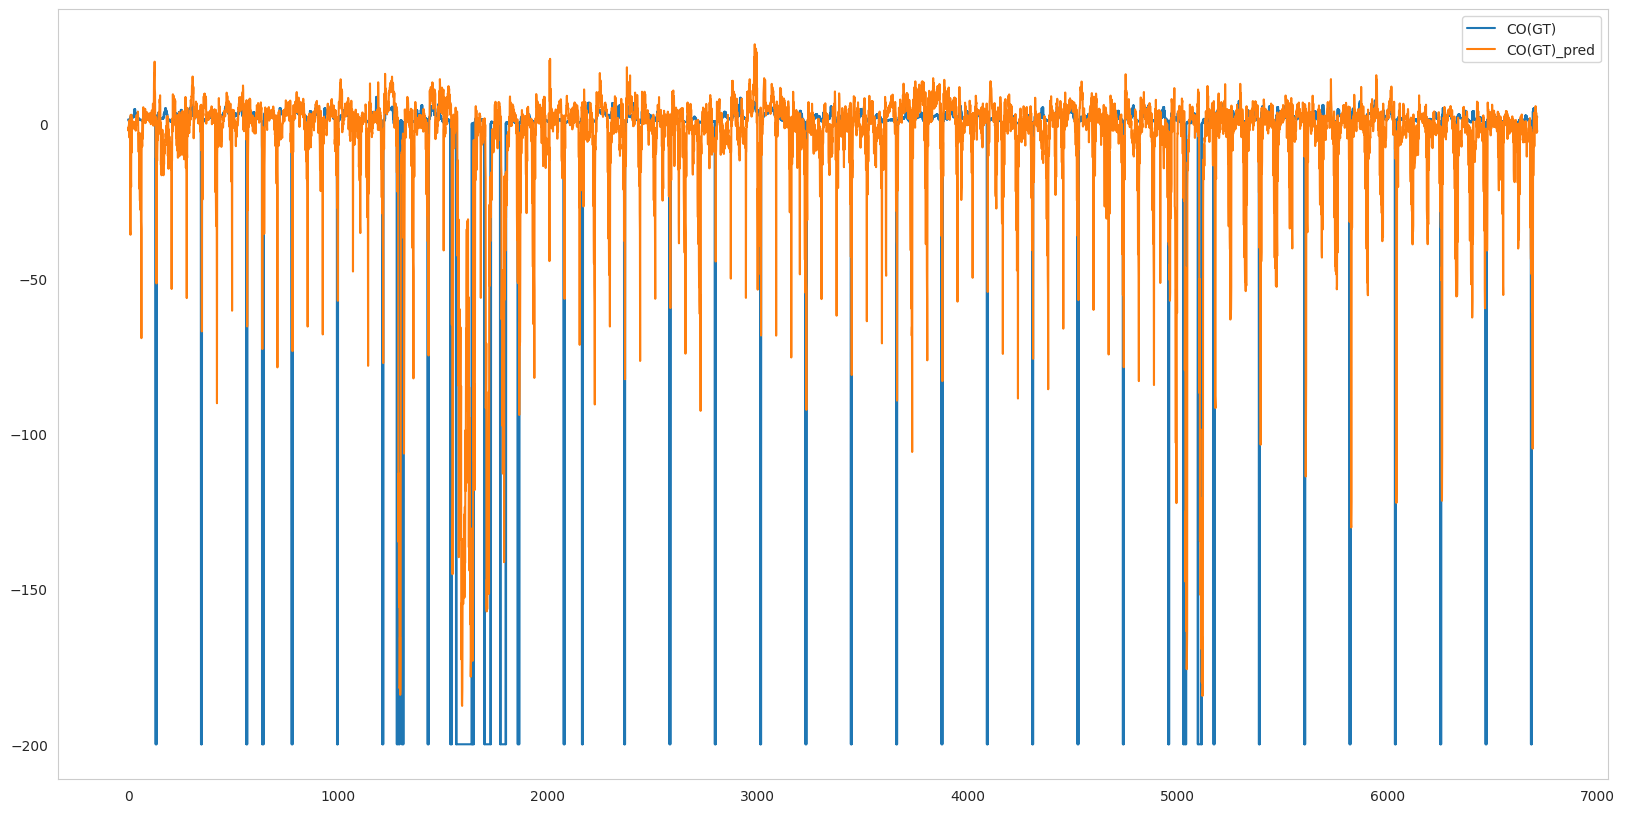

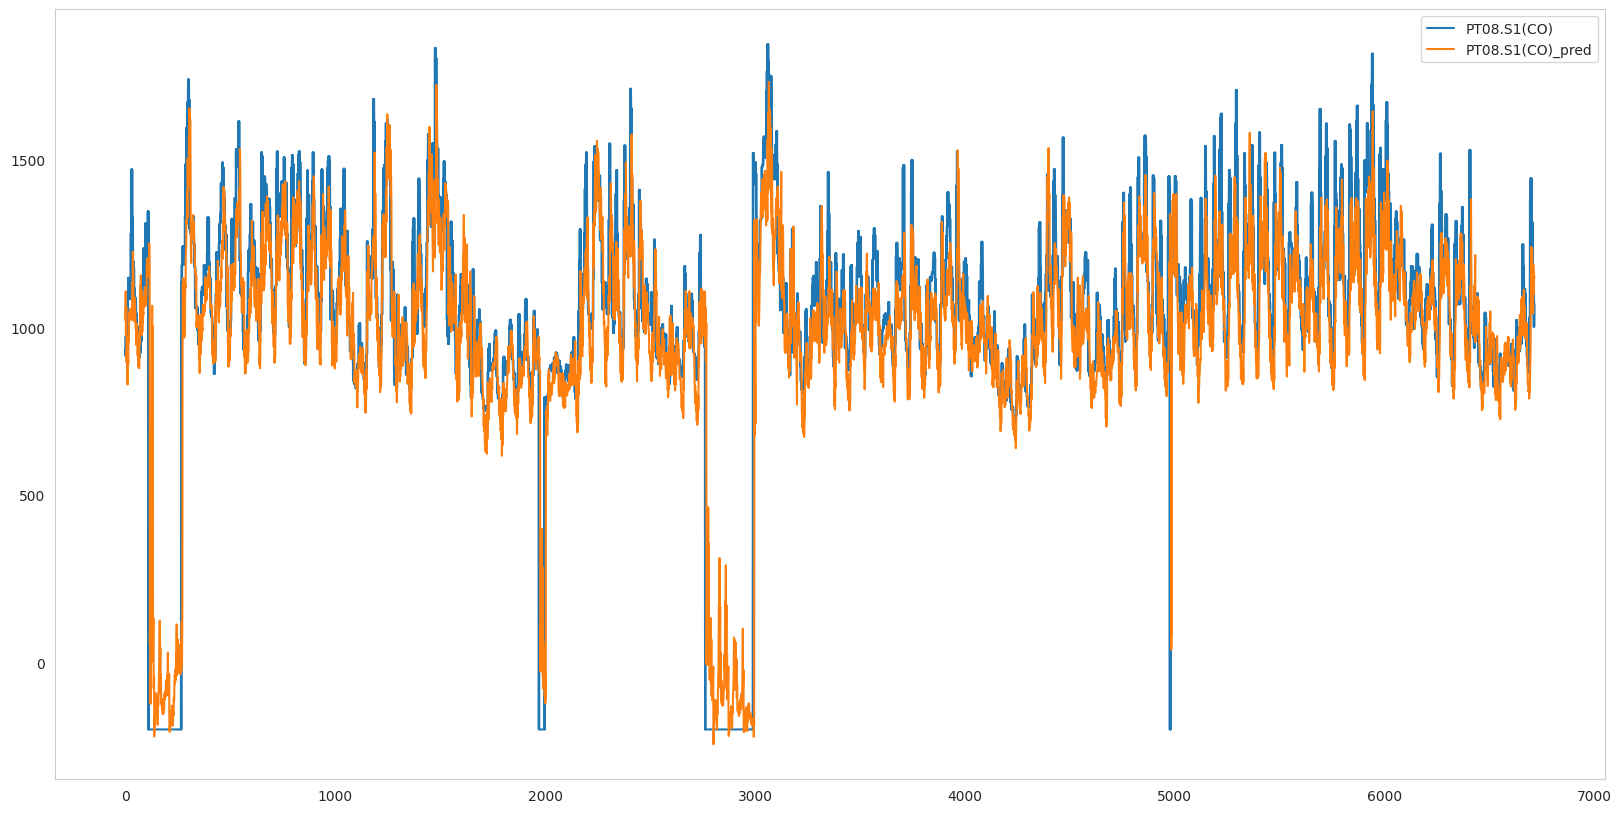

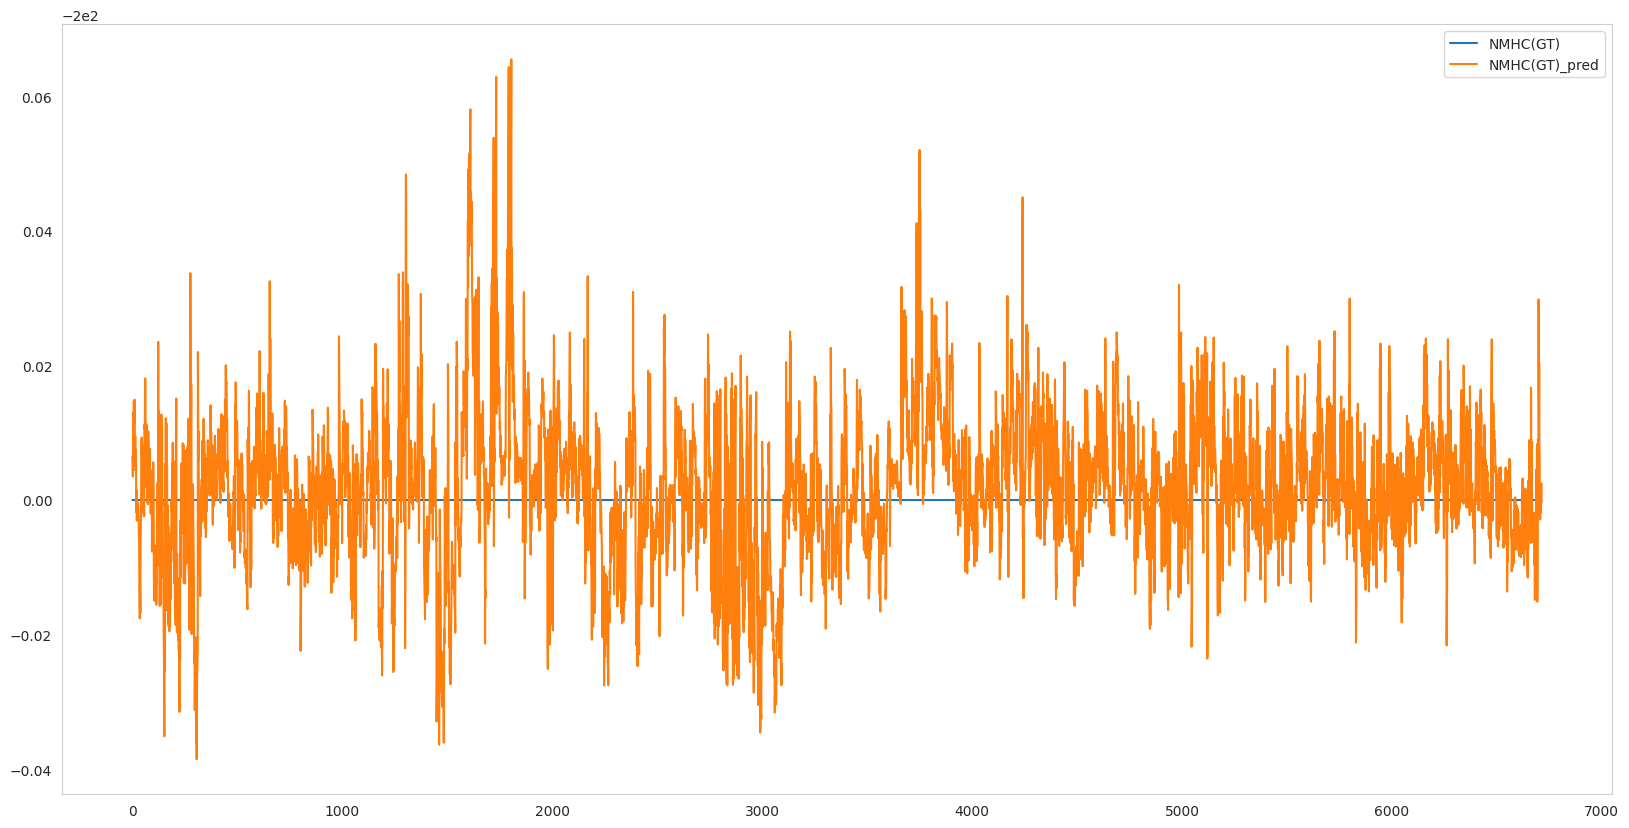

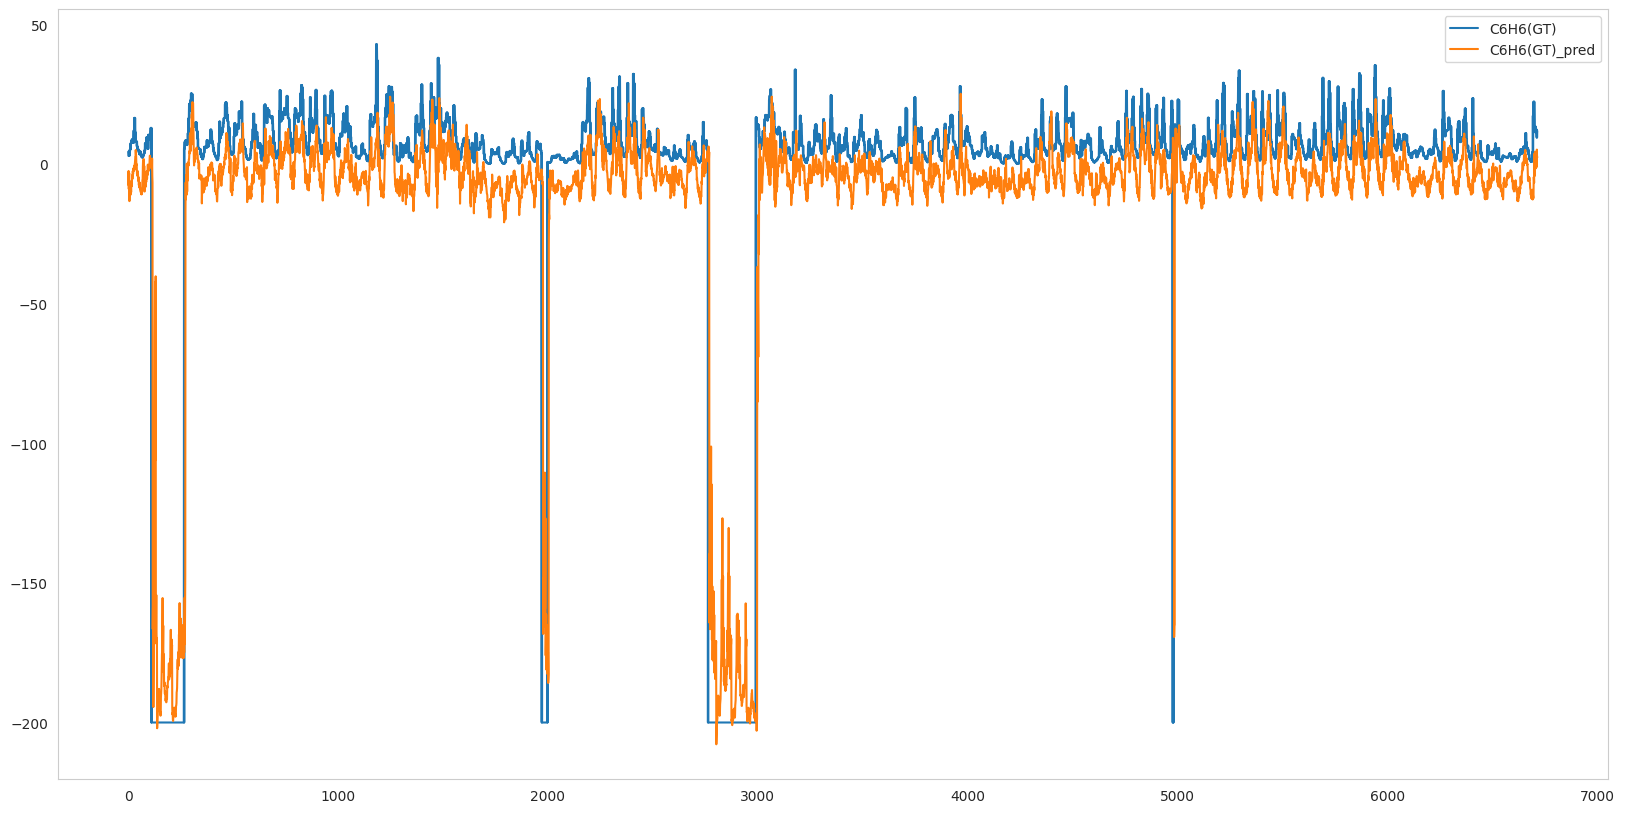

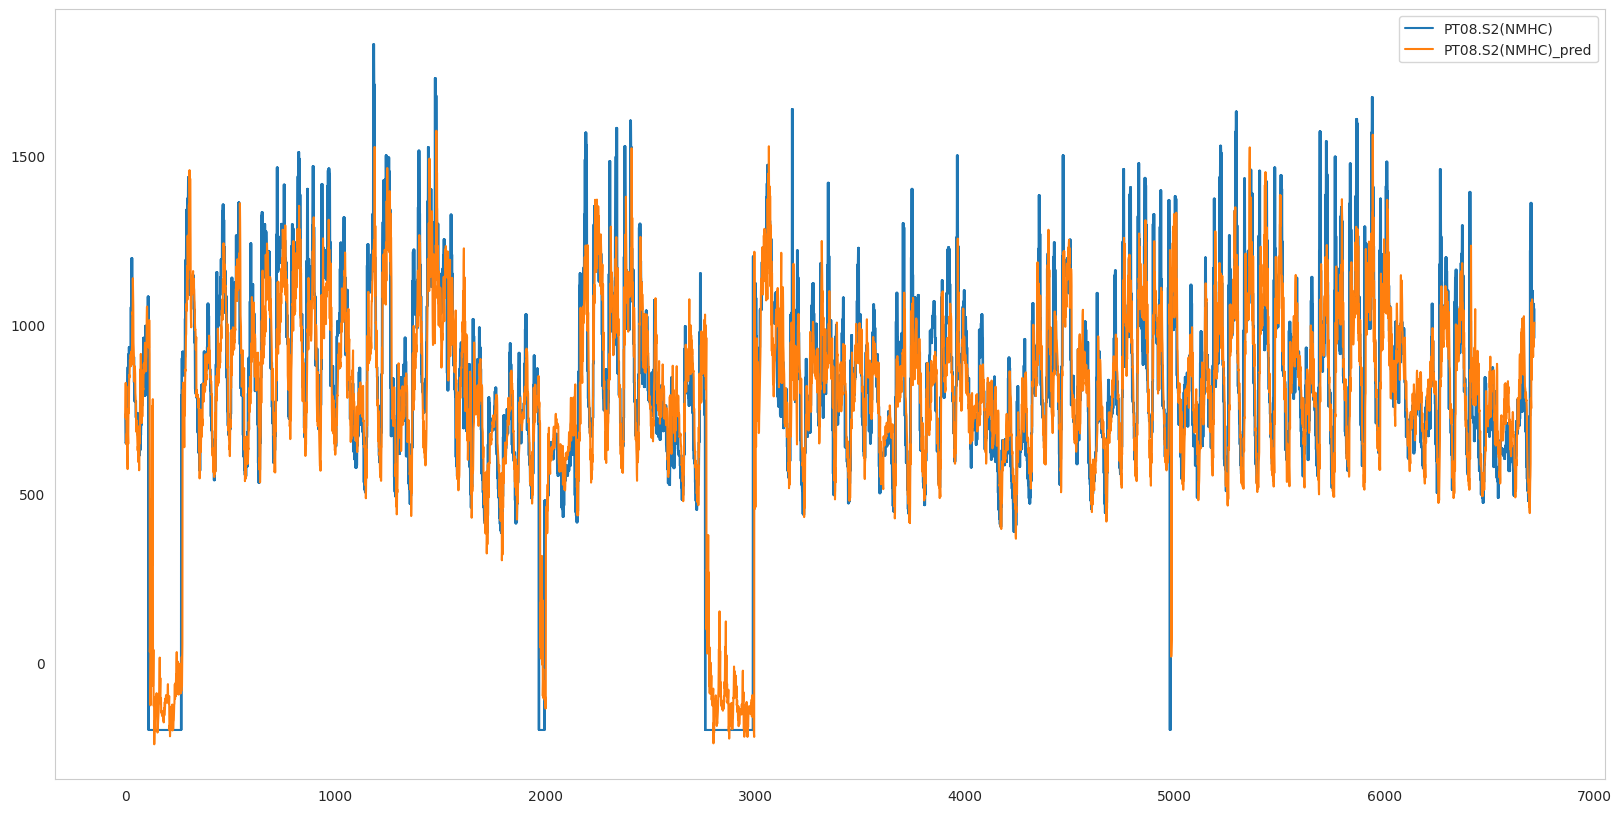

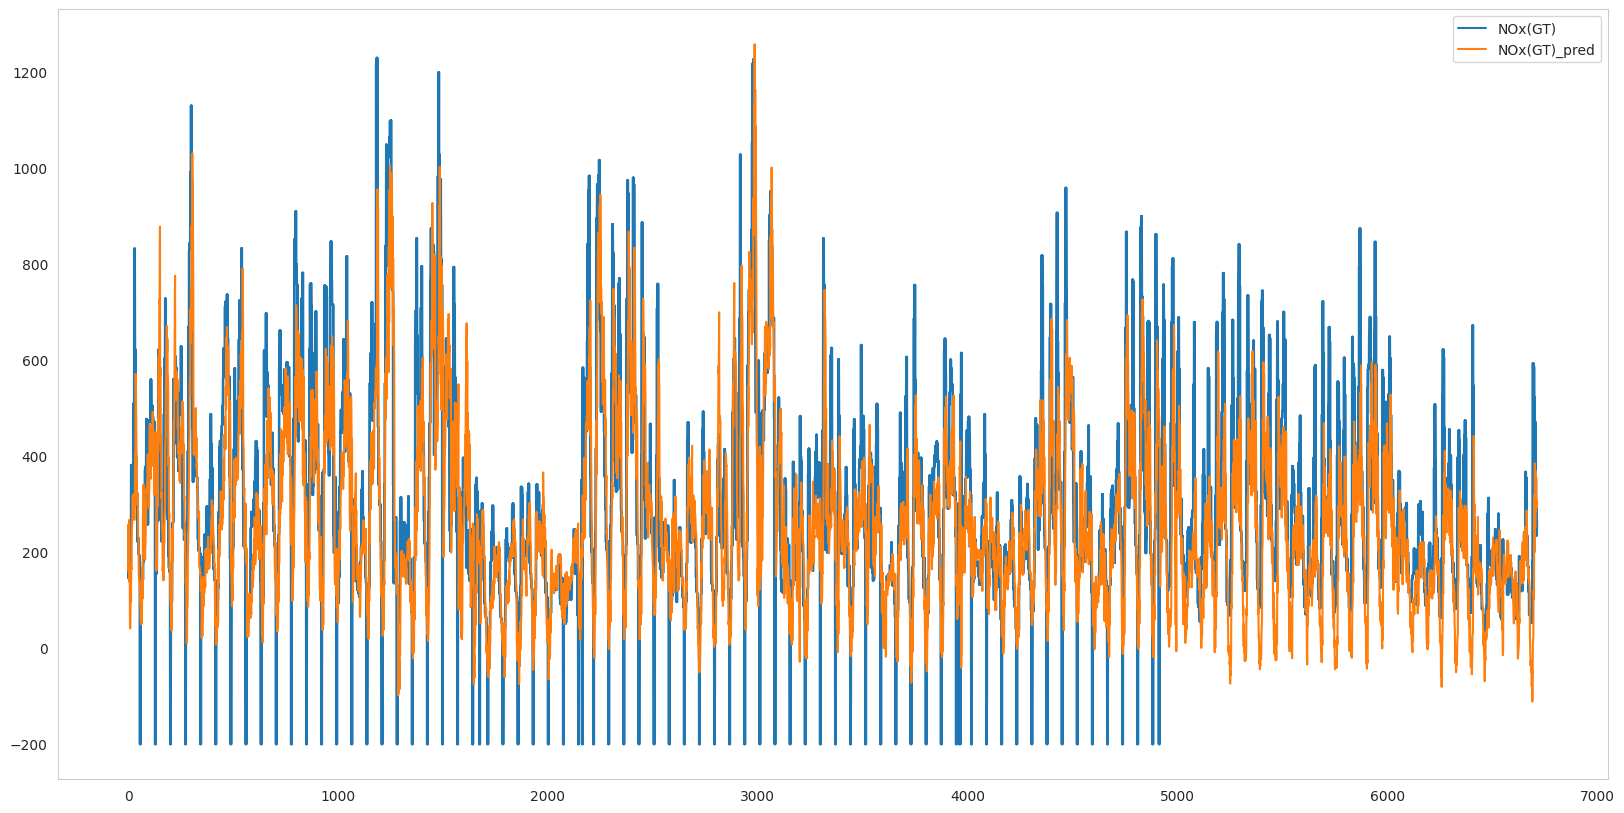

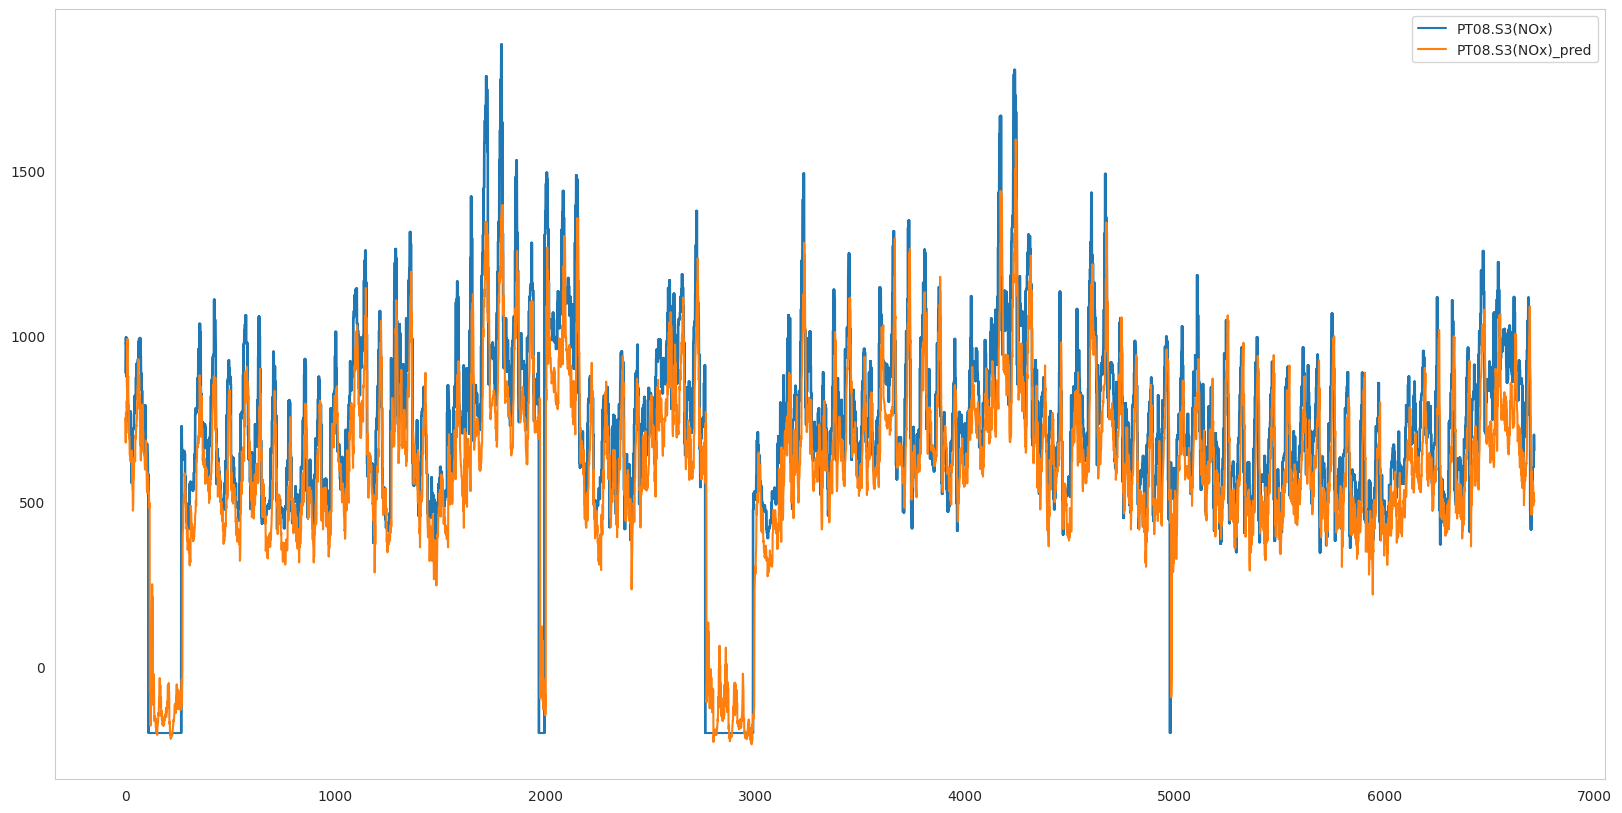

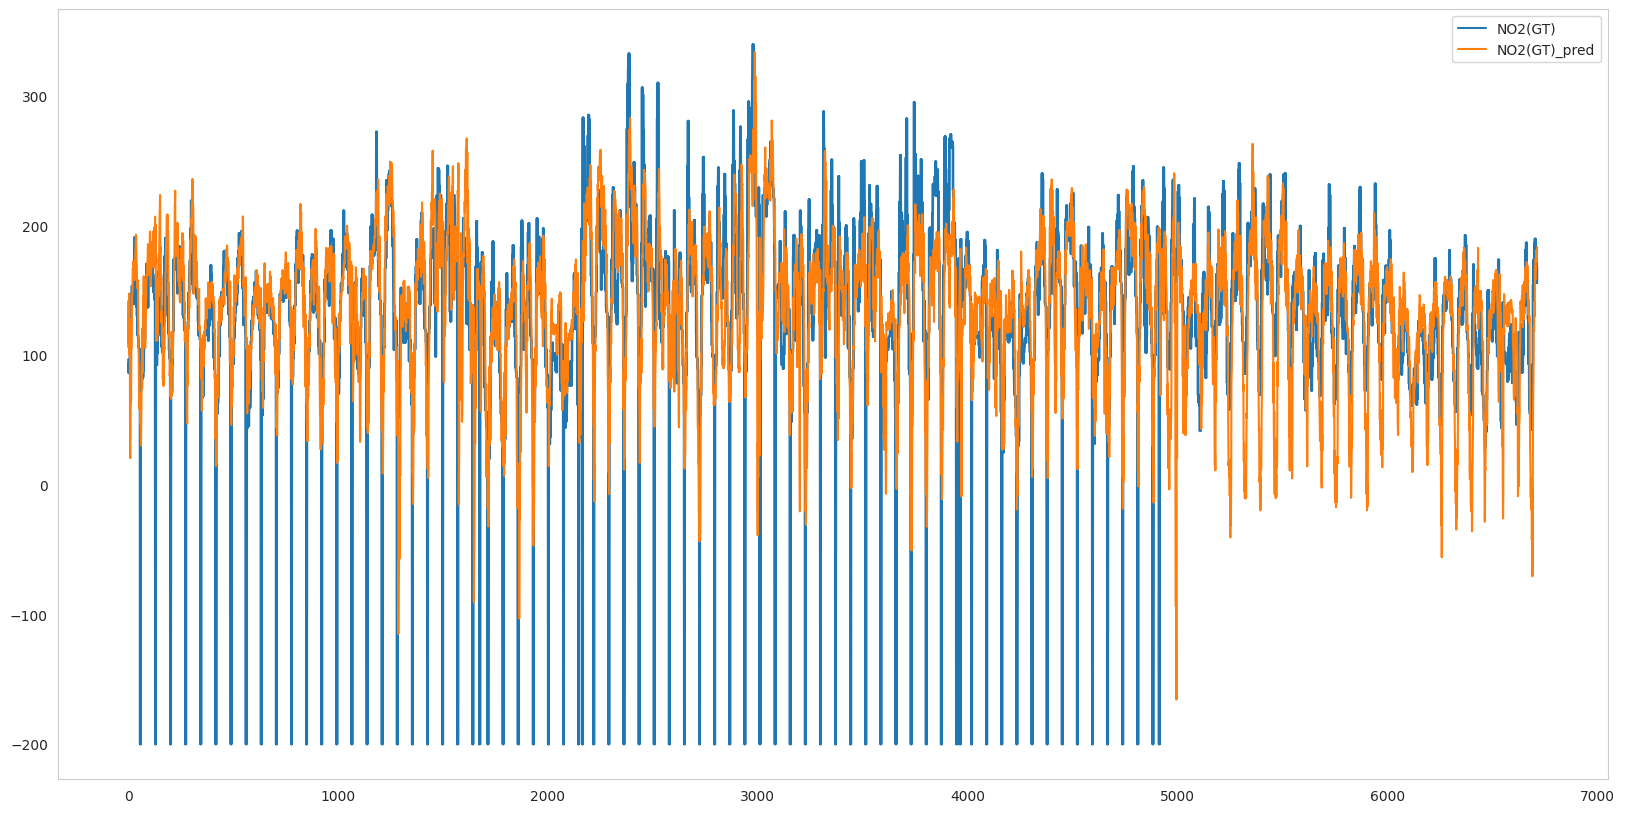

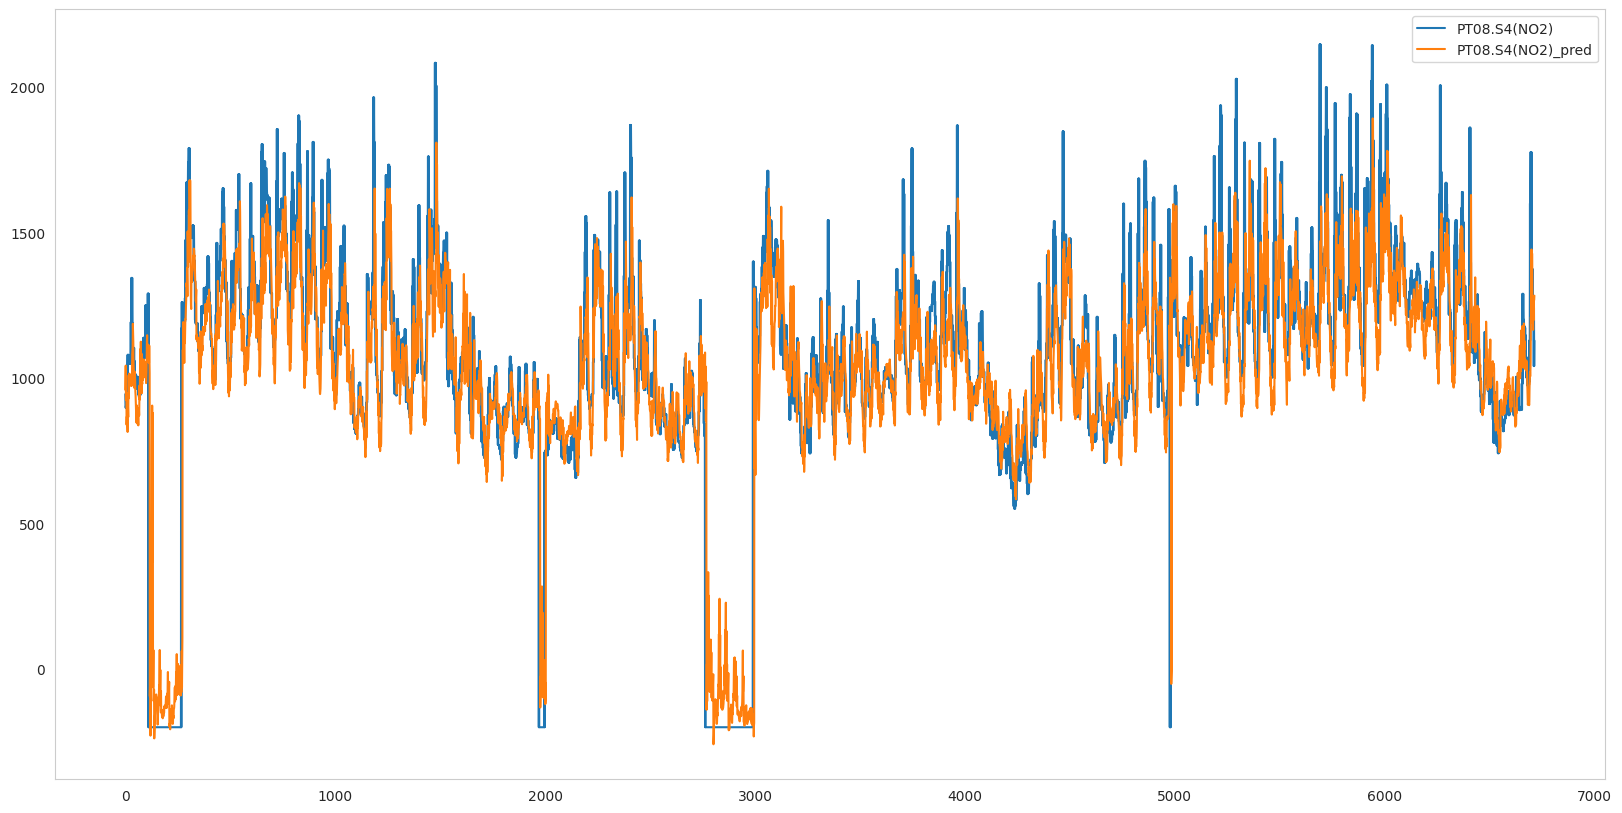

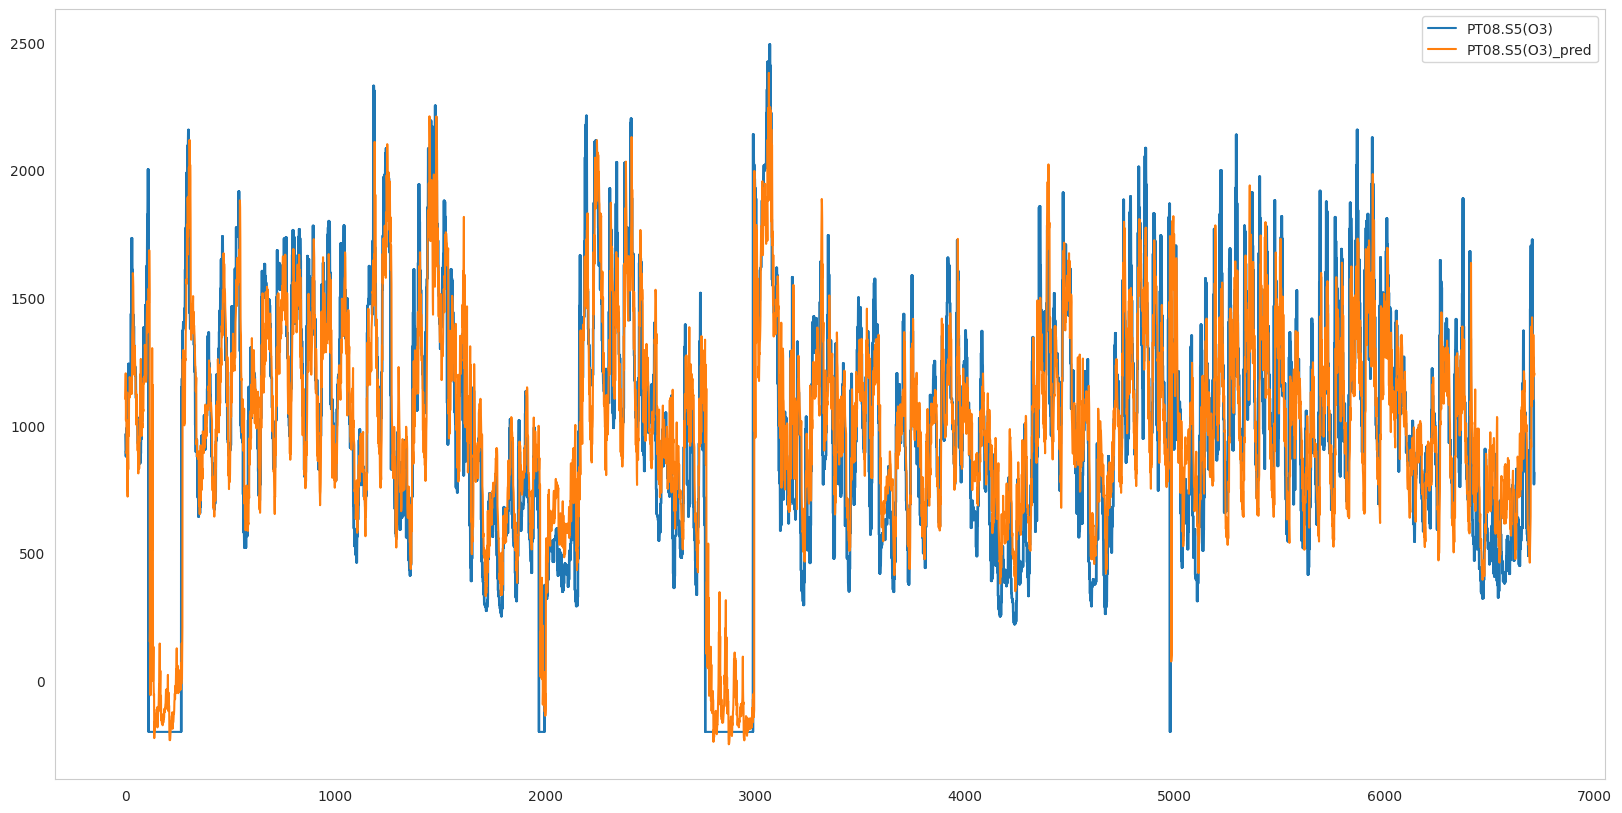

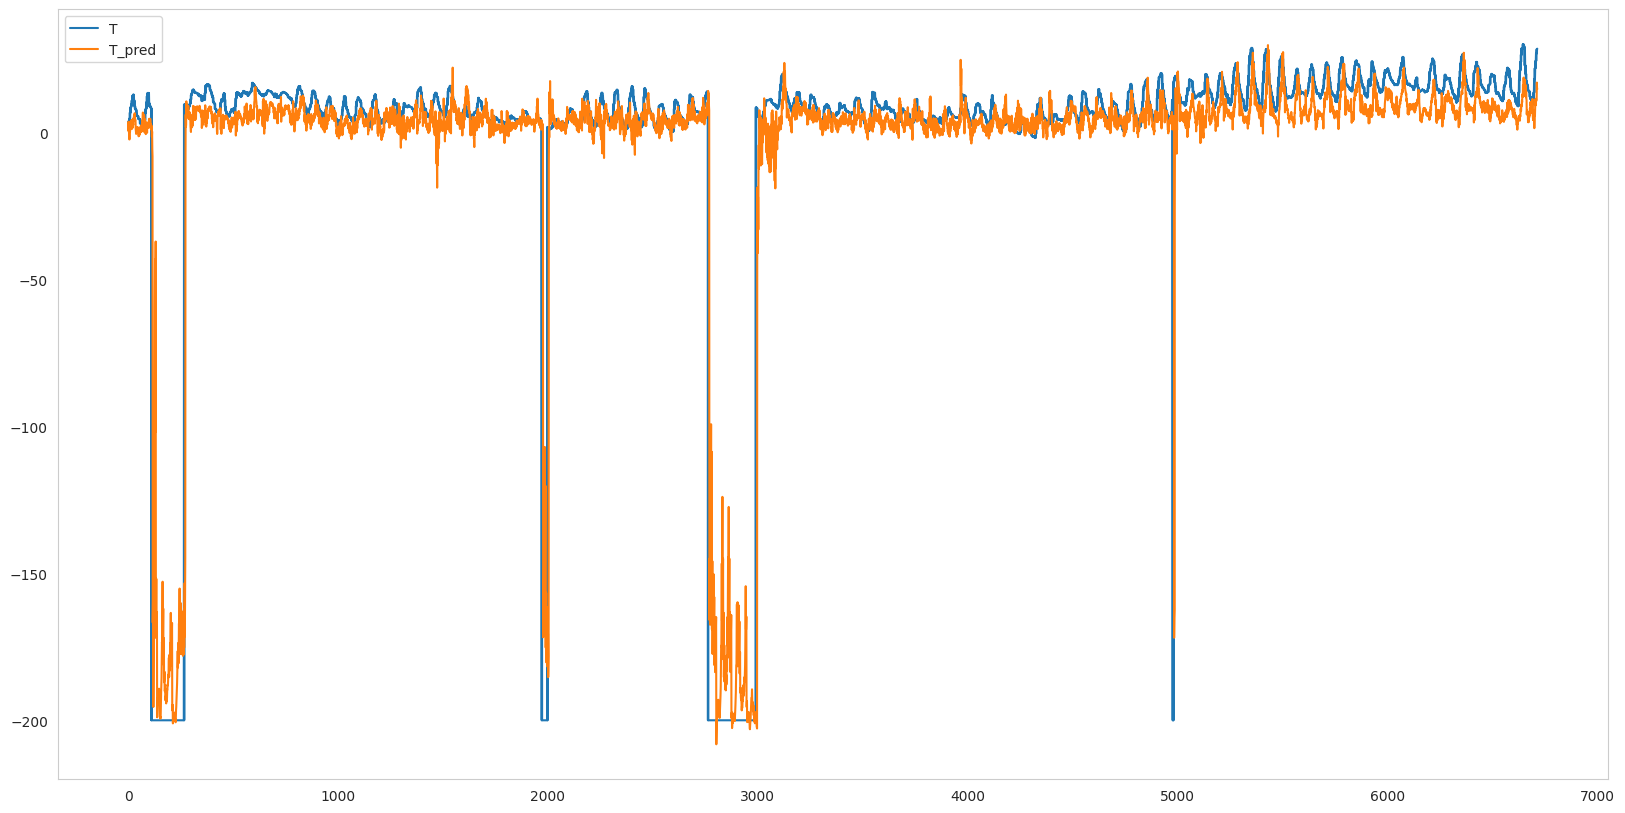

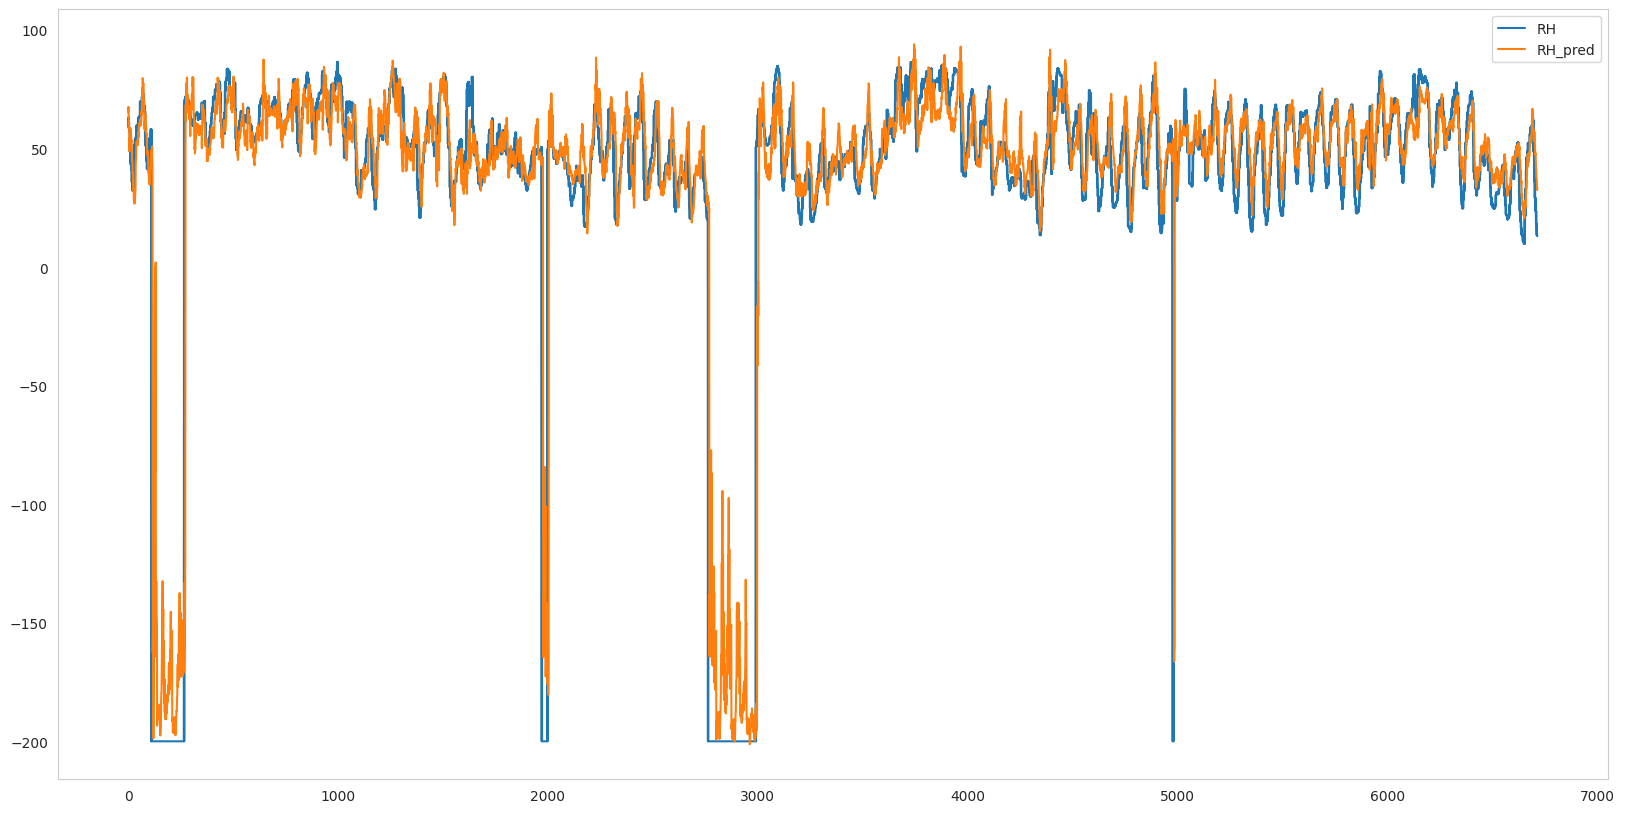

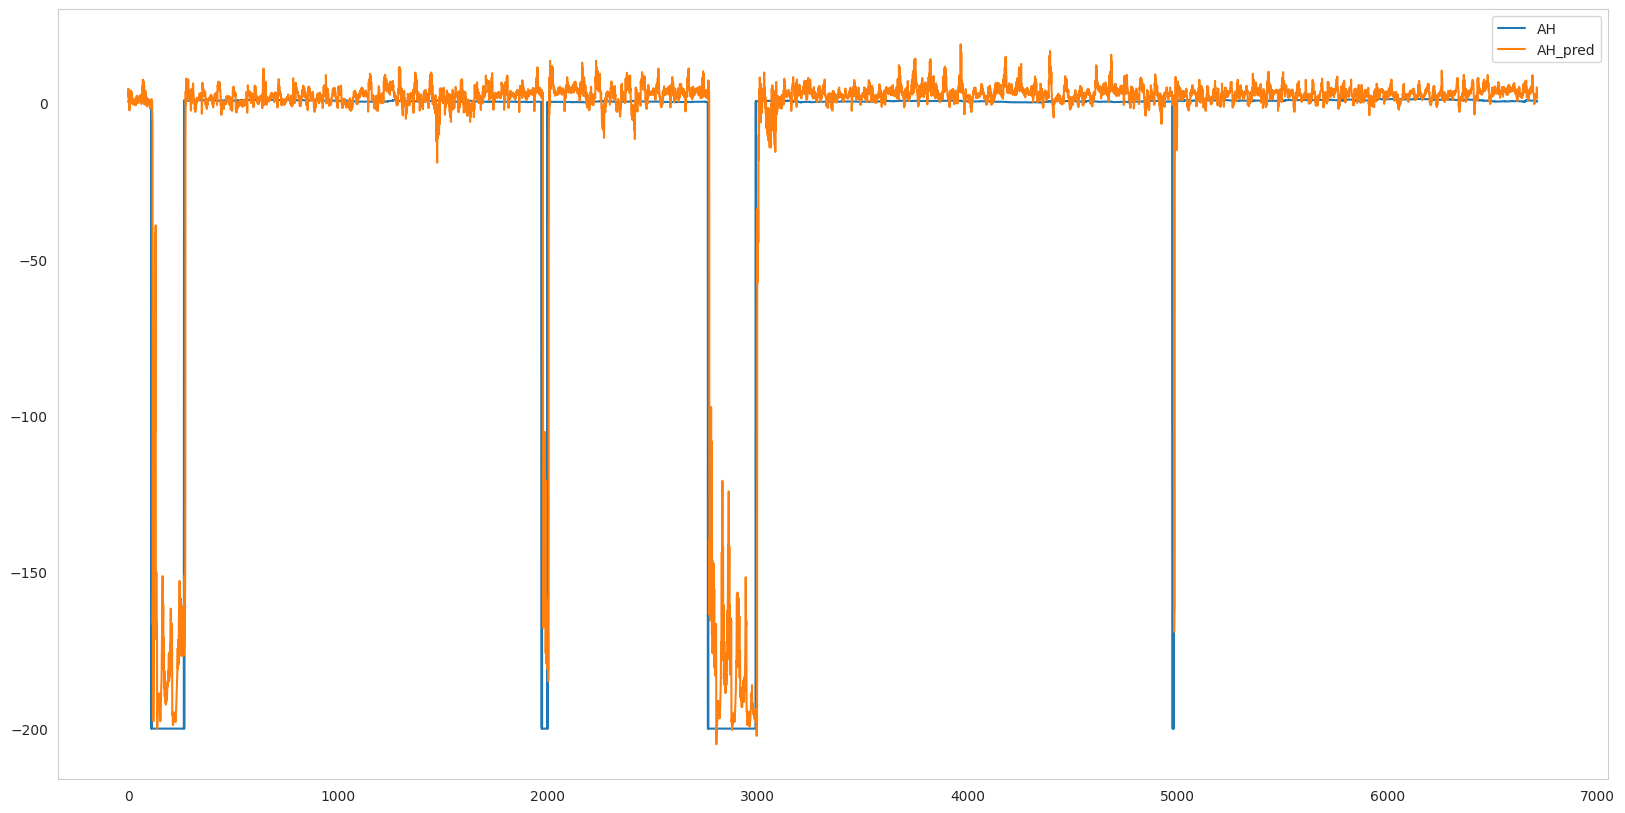

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False
df_final[['CO(GT)', 'CO(GT)_pred']].plot()
df_final[['PT08.S1(CO)', 'PT08.S1(CO)_pred']].plot()
df_final[['NMHC(GT)', 'NMHC(GT)_pred']].plot()
df_final[['C6H6(GT)', 'C6H6(GT)_pred']].plot()
df_final[['PT08.S2(NMHC)', 'PT08.S2(NMHC)_pred']].plot()
df_final[['NOx(GT)', 'NOx(GT)_pred']].plot()
df_final[['PT08.S3(NOx)', 'PT08.S3(NOx)_pred']].plot()
df_final[['NO2(GT)', 'NO2(GT)_pred']].plot()
df_final[['PT08.S4(NO2)', 'PT08.S4(NO2)_pred']].plot()
df_final[['PT08.S5(O3)', 'PT08.S5(O3)_pred']].plot()
df_final[['T', 'T_pred']].plot()
df_final[['RH', 'RH_pred']].plot()
df_final[['AH', 'AH_pred']].plot()

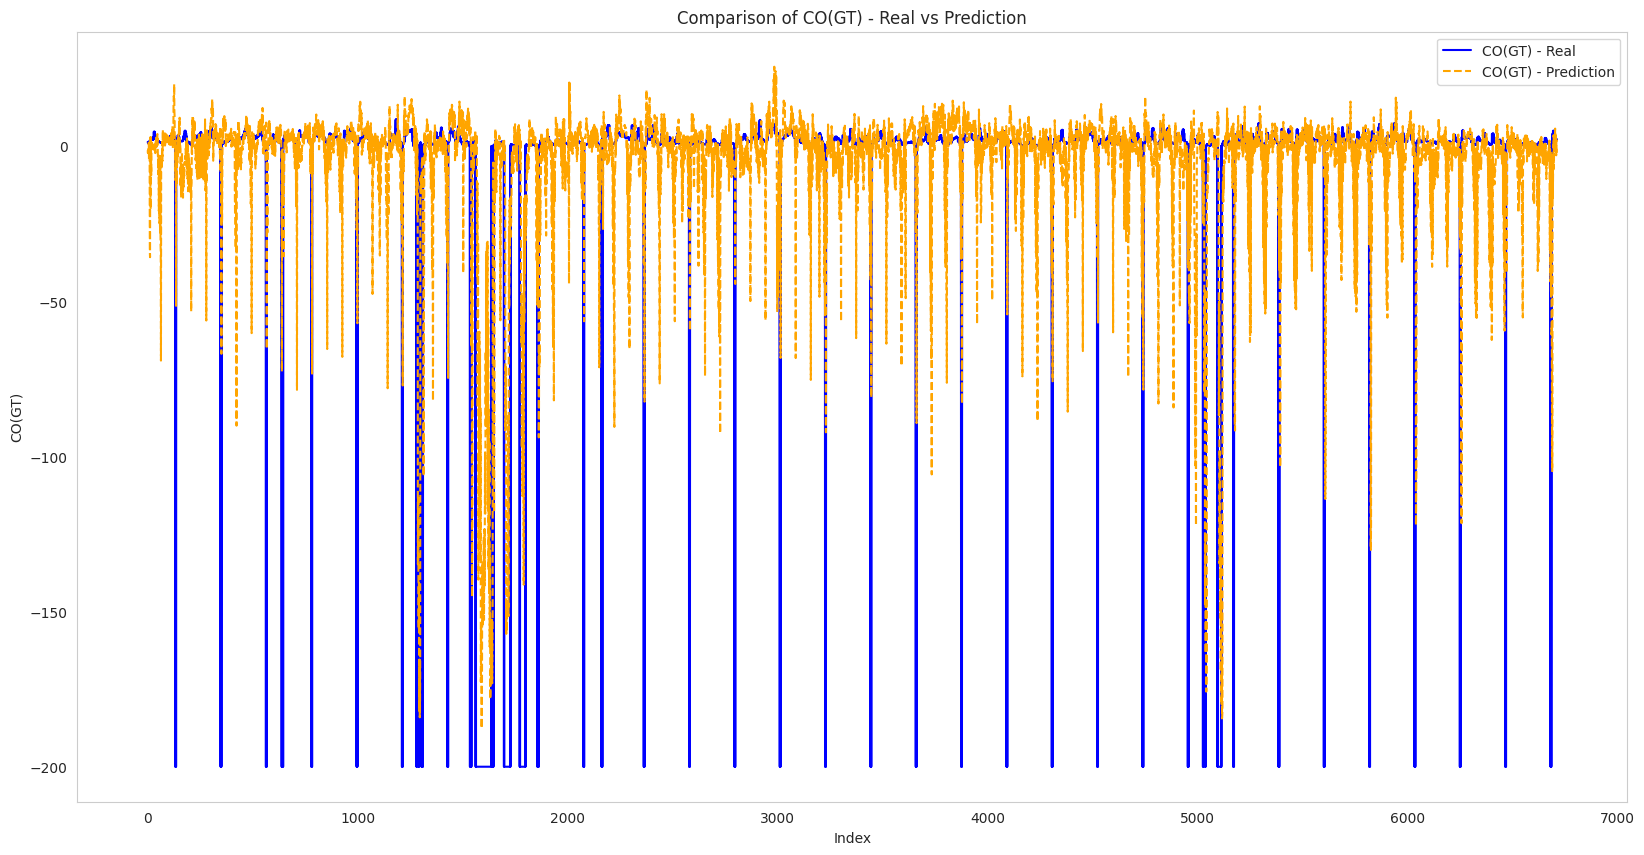

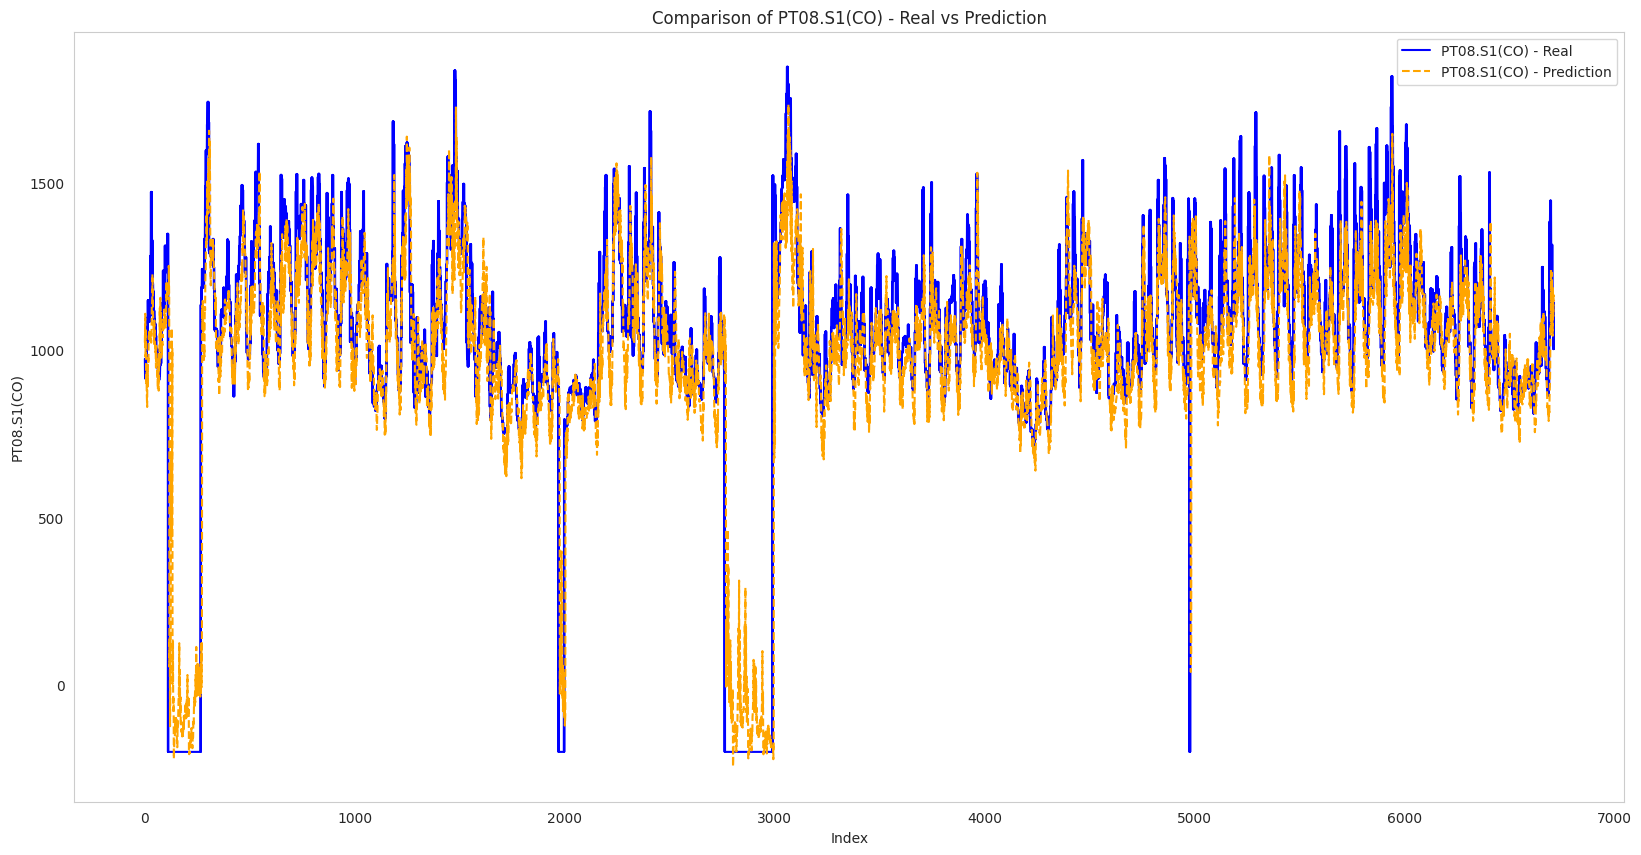

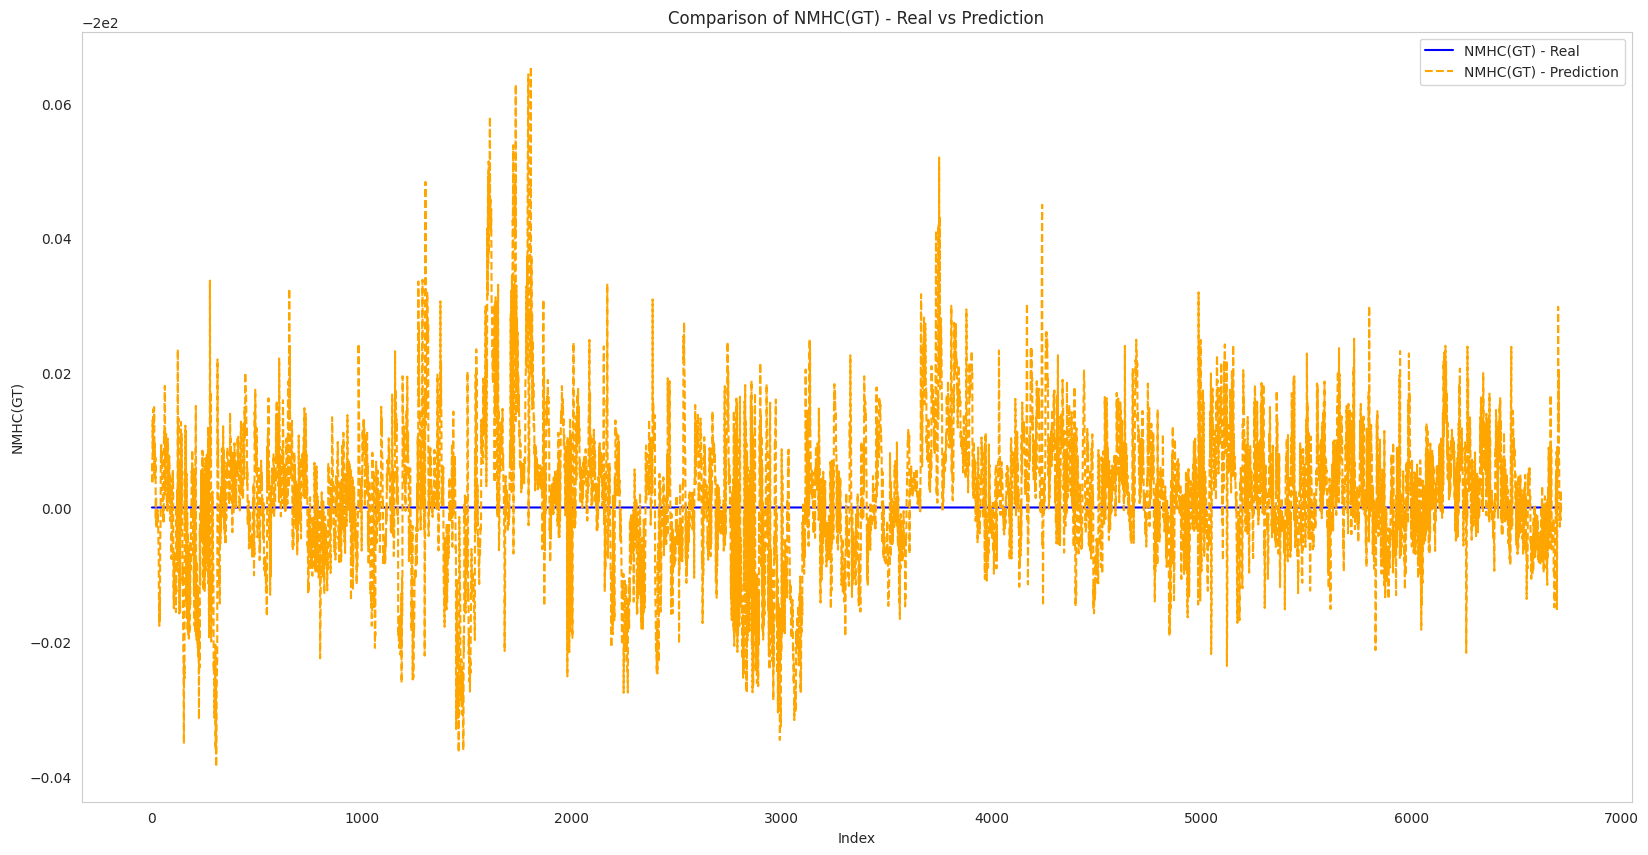

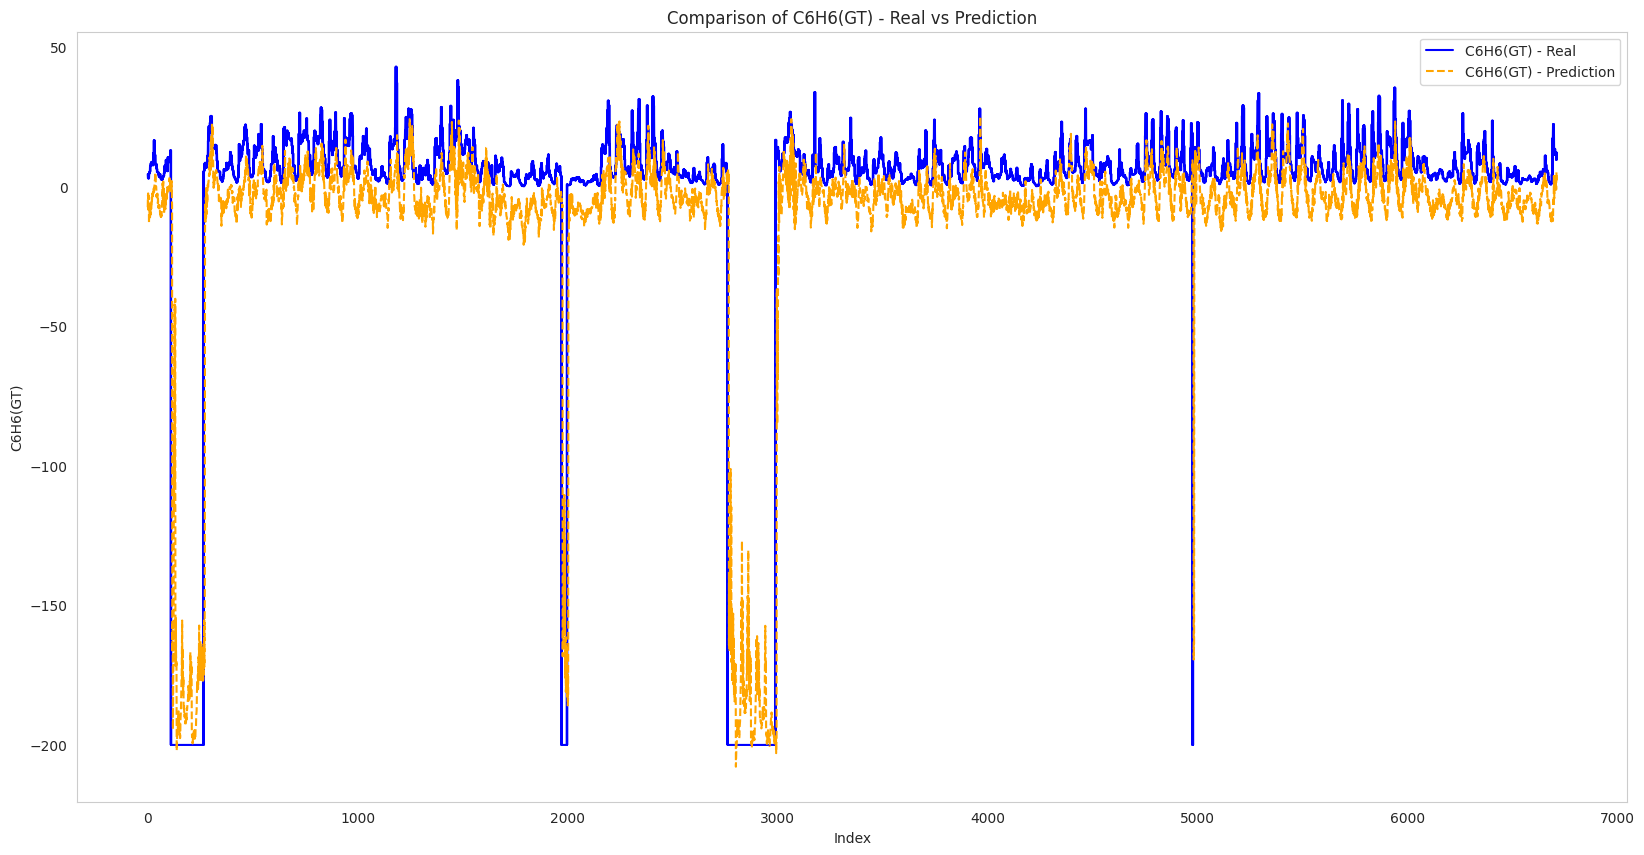

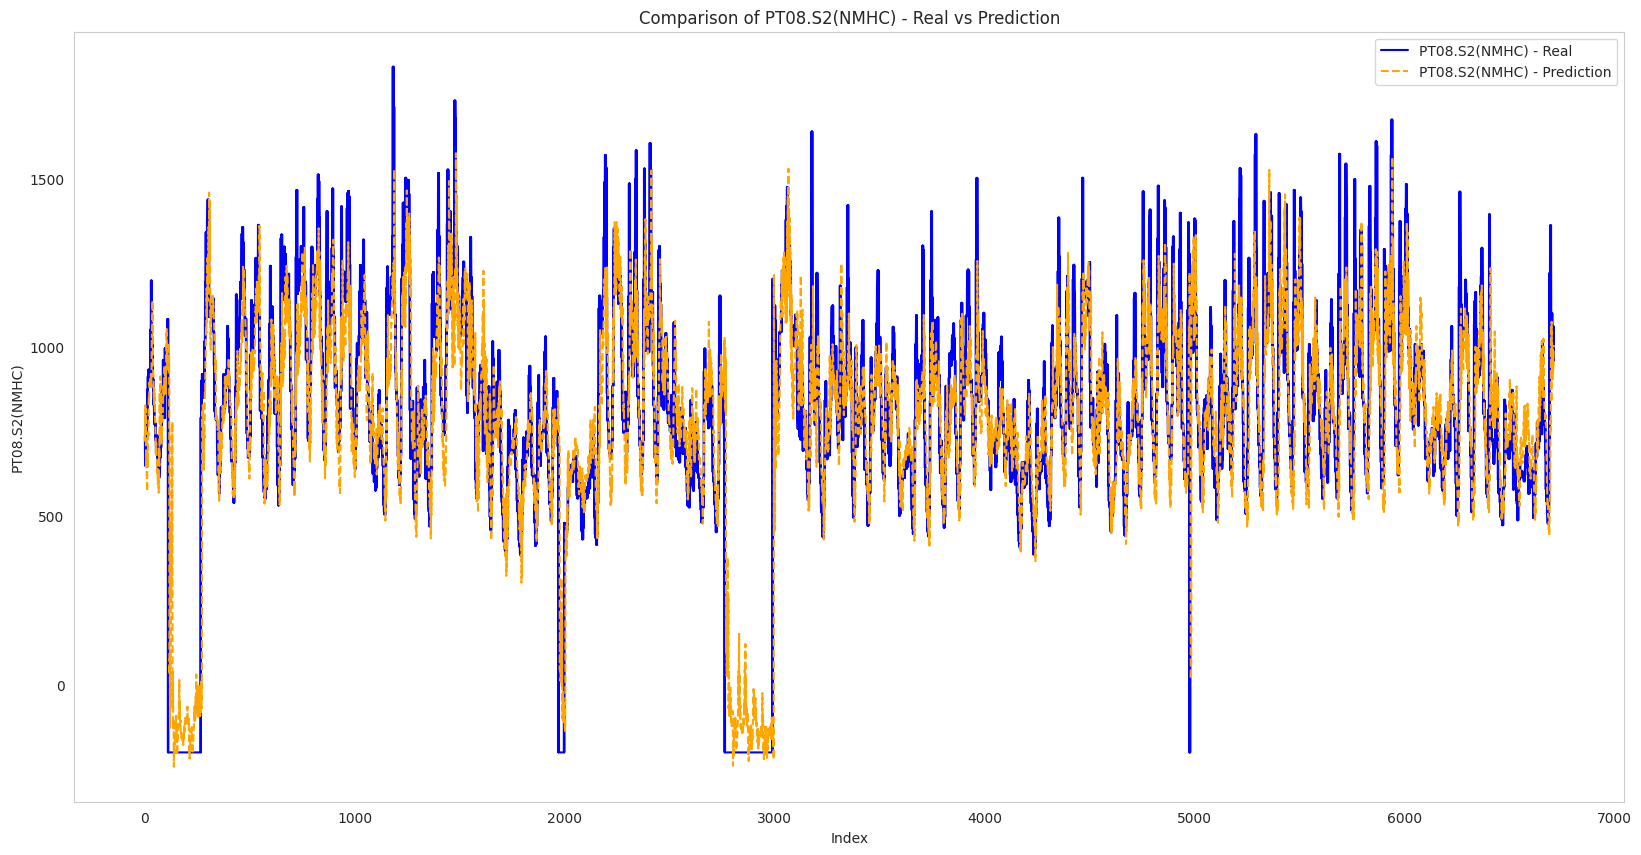

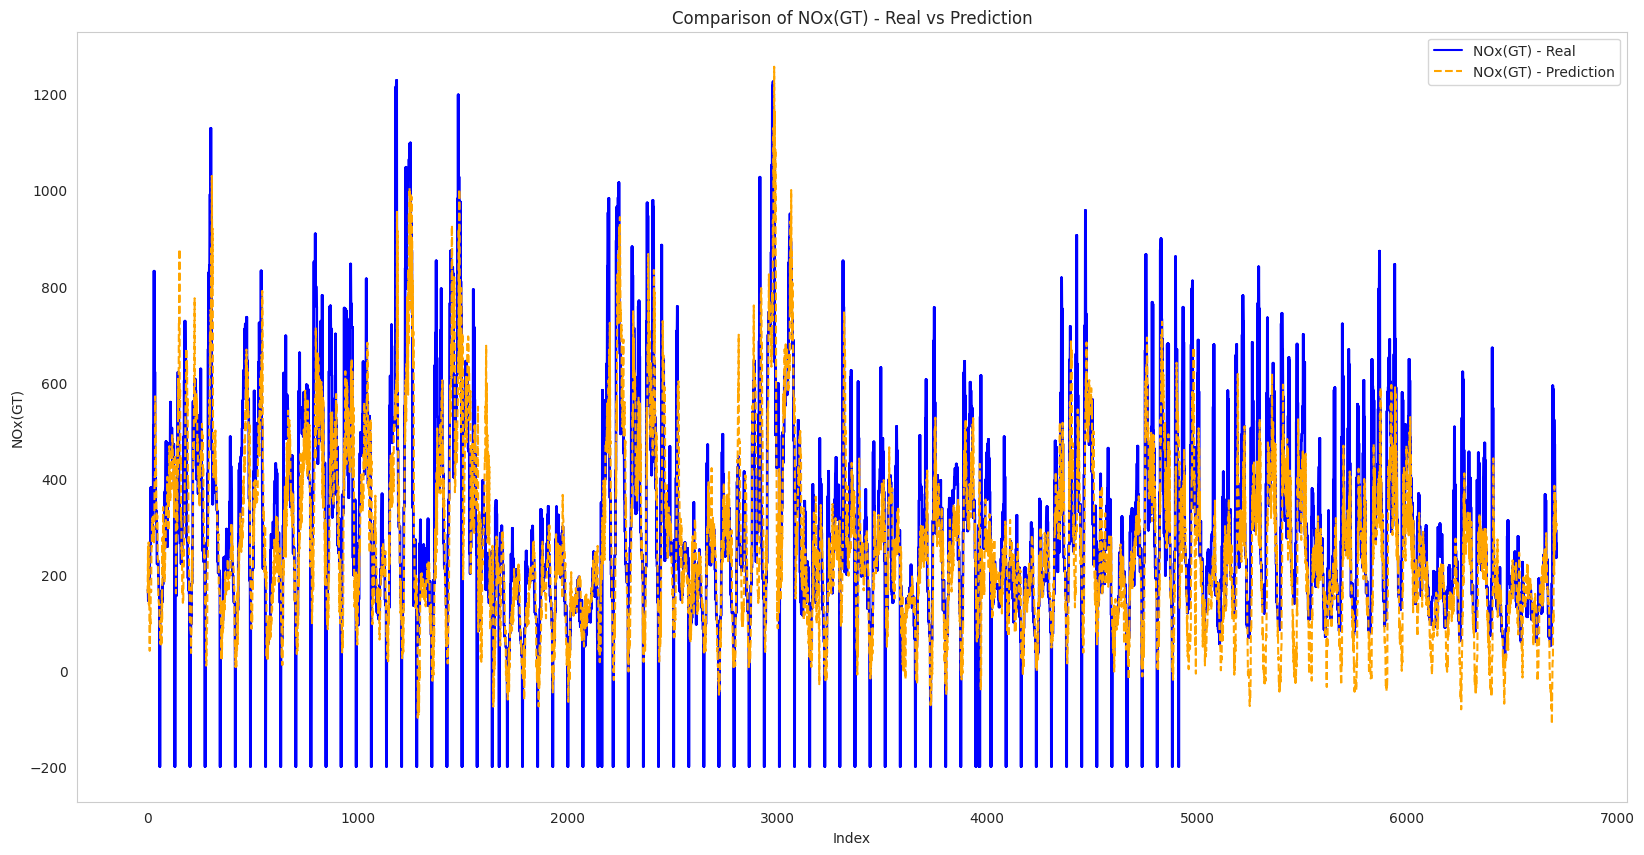

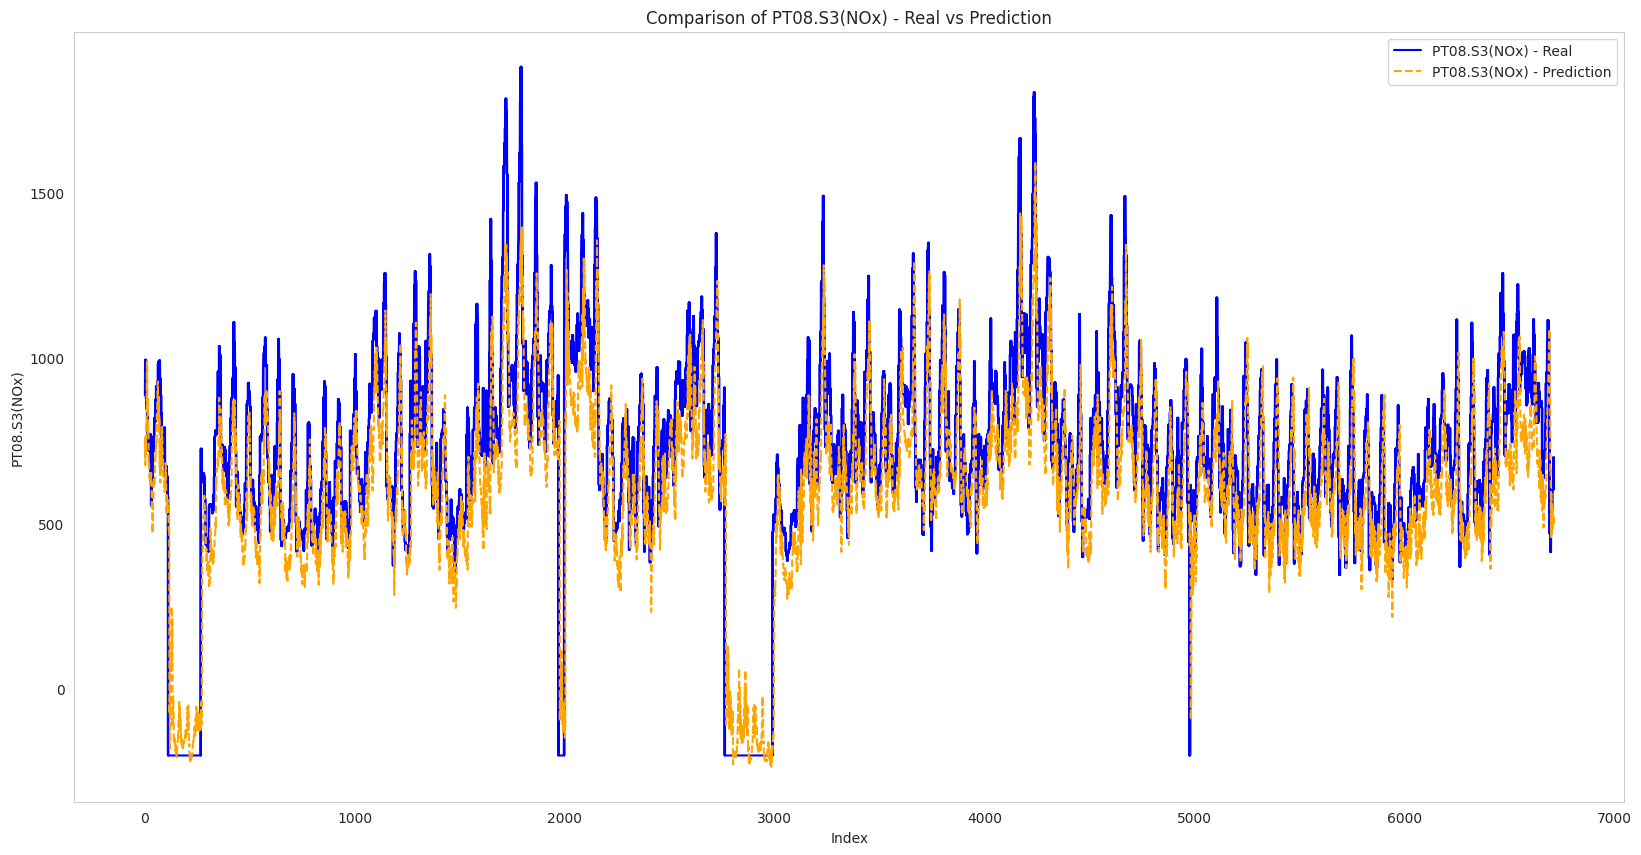

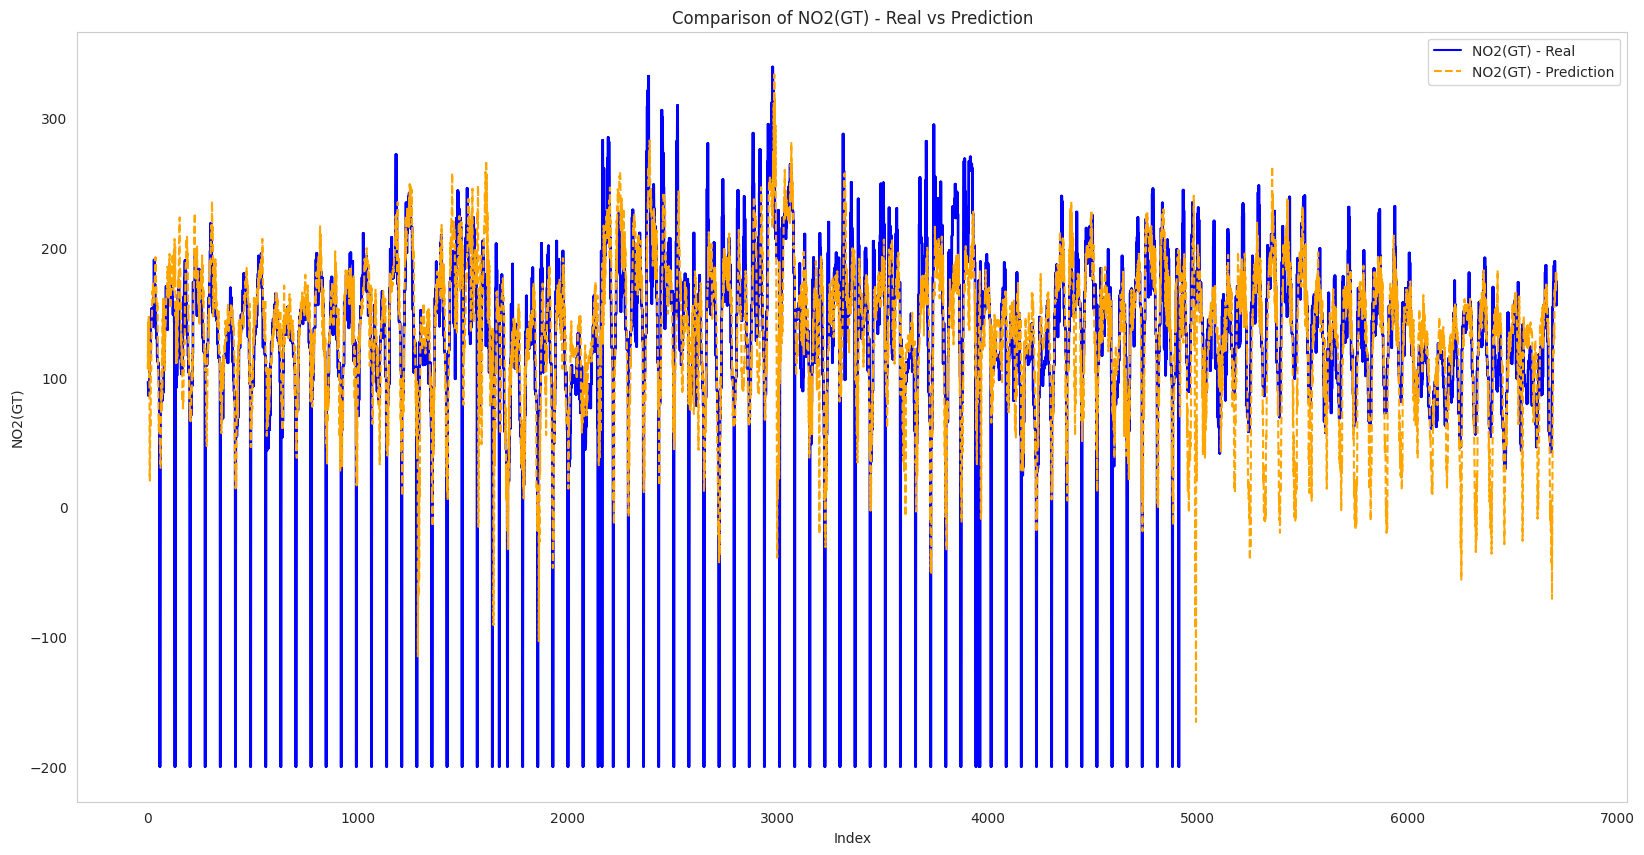

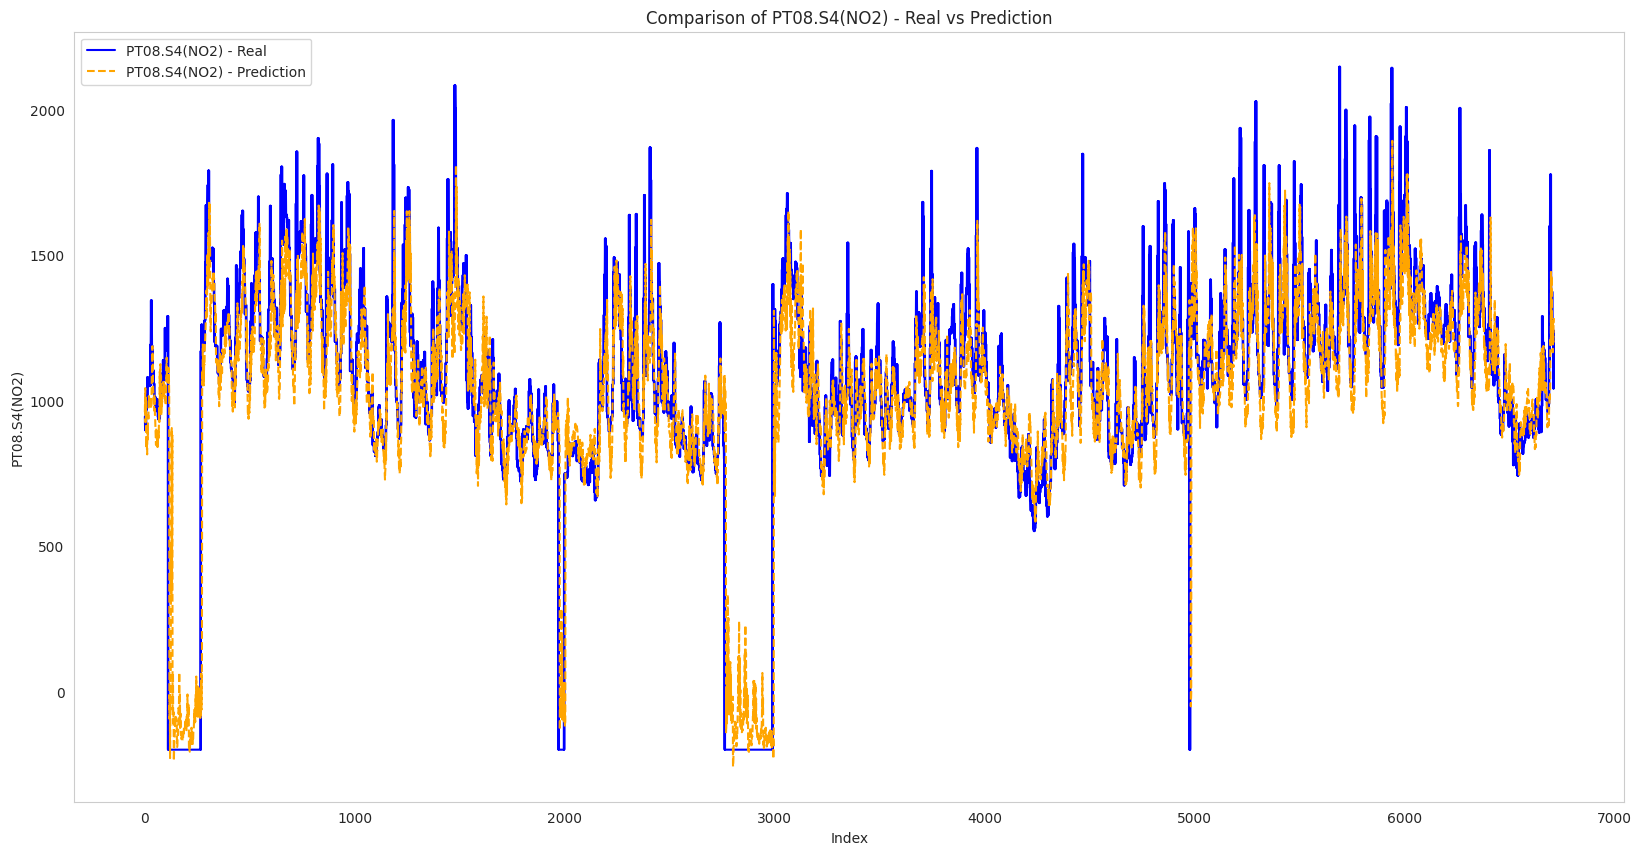

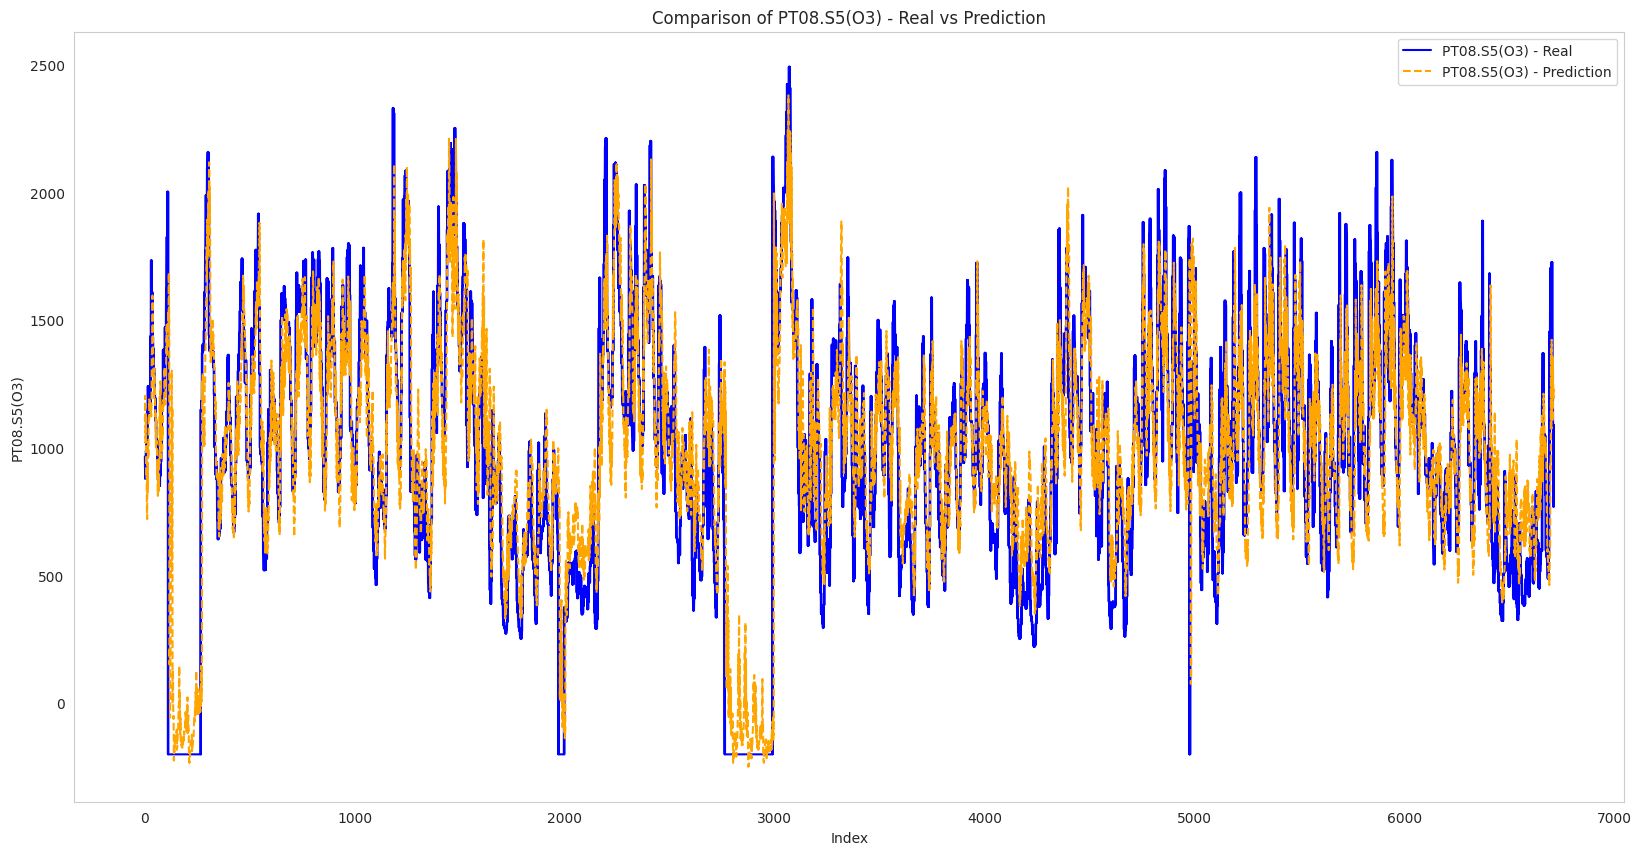

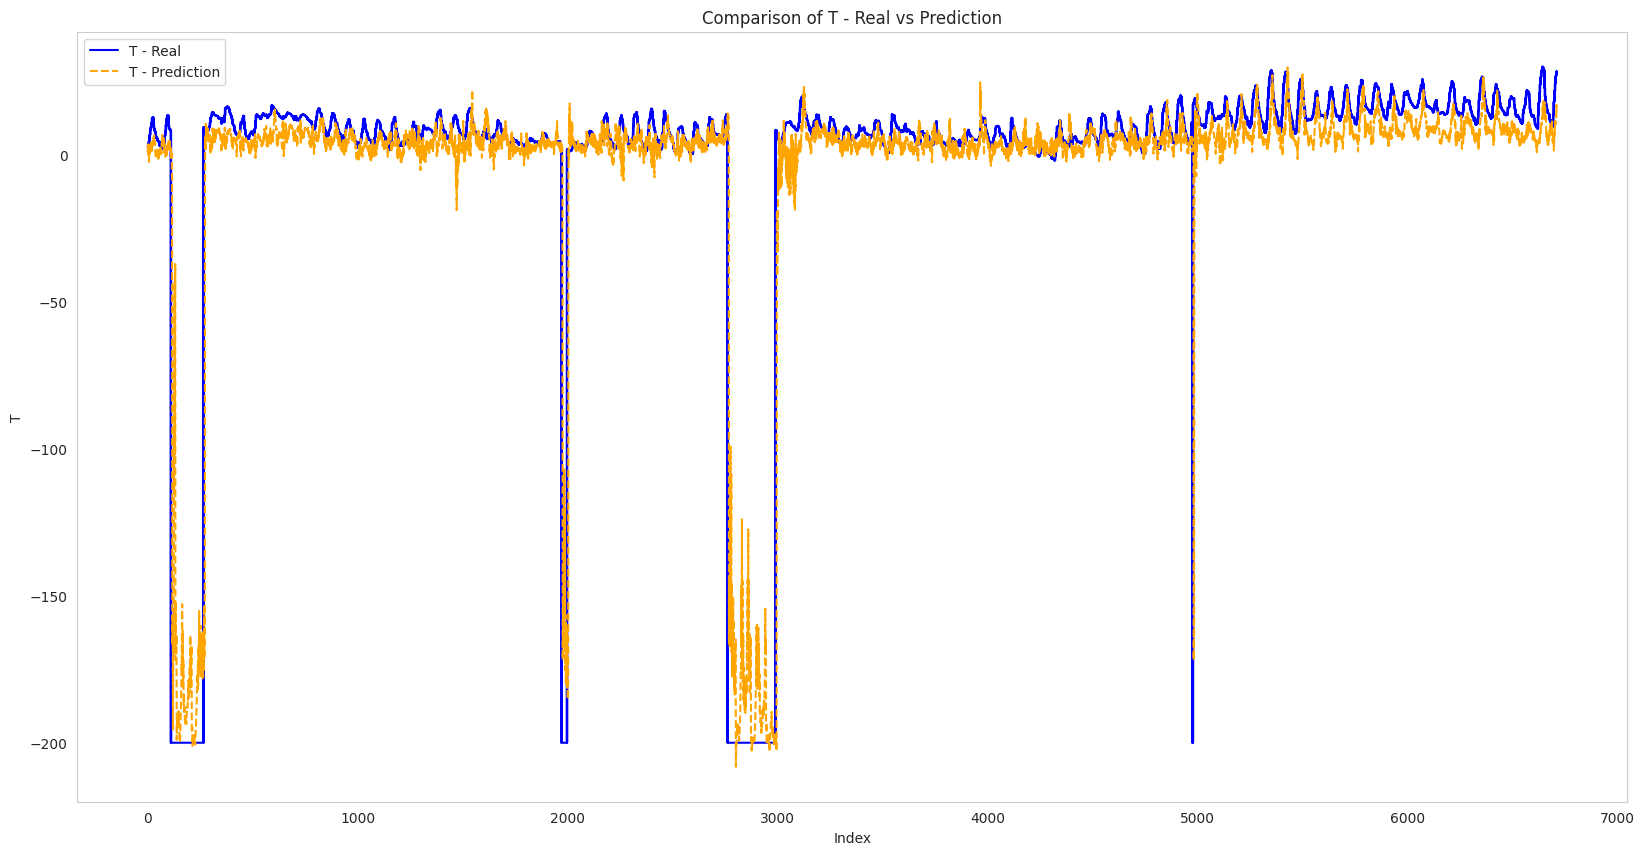

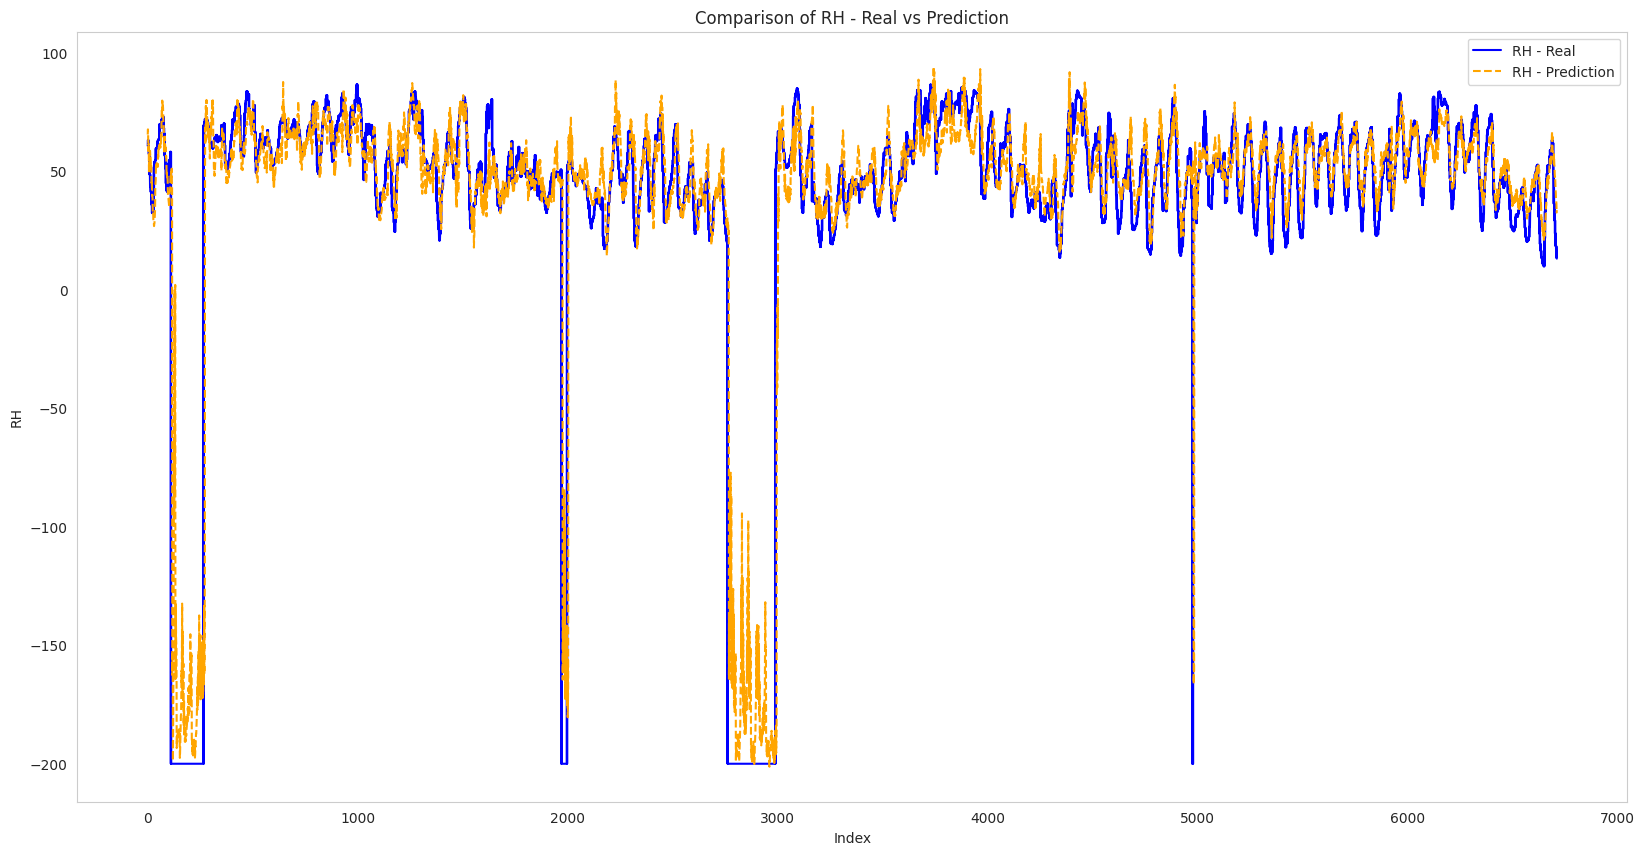

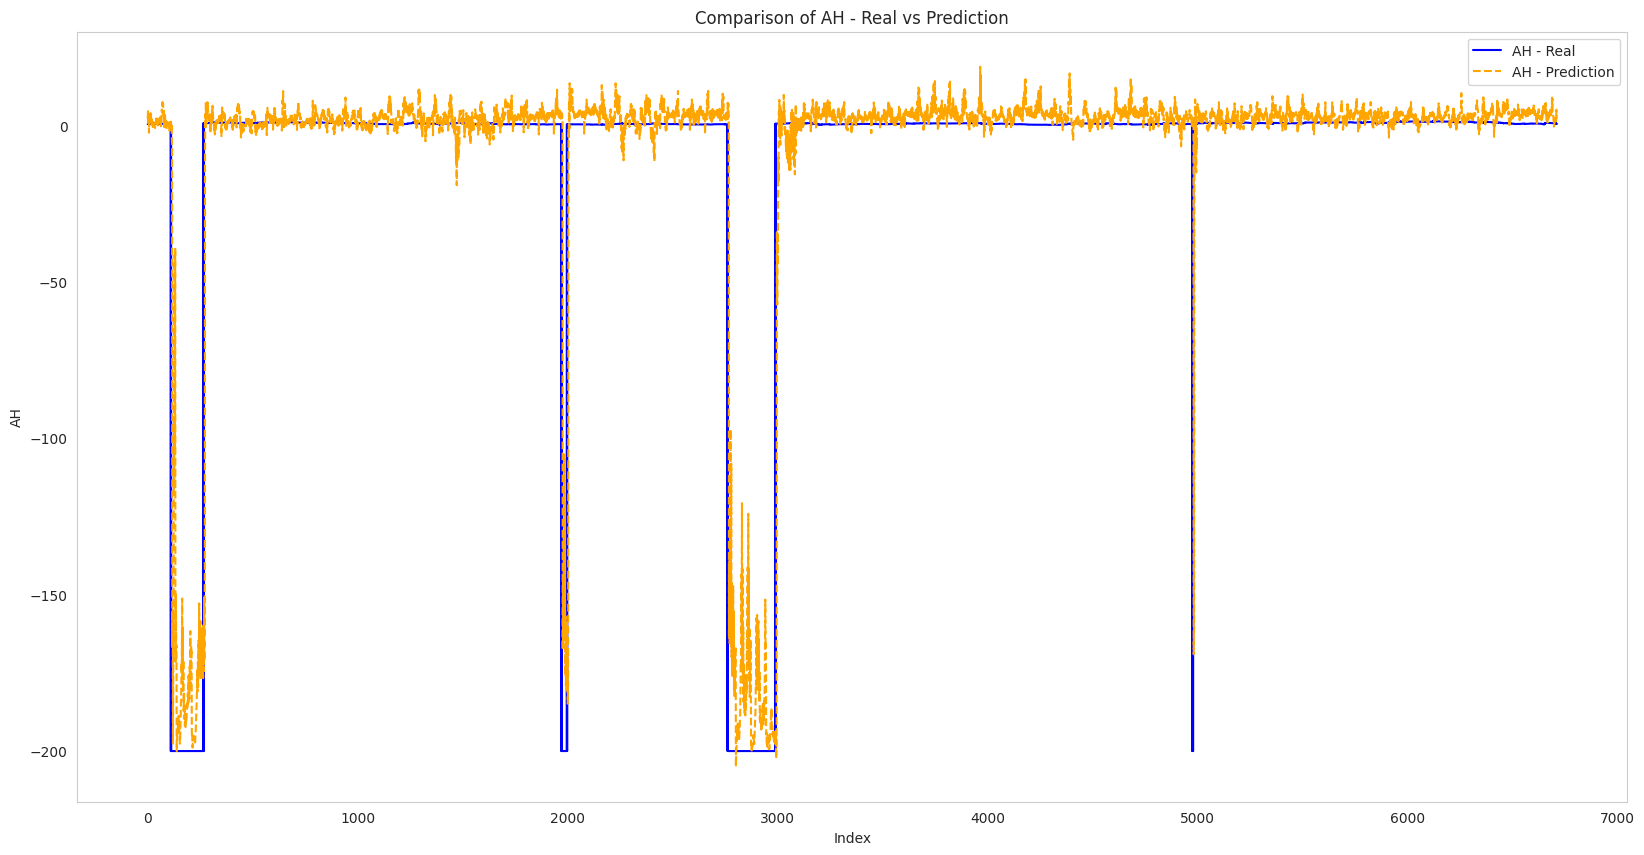

In [ ]:
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['axes.grid'] = False

columns = df_final.columns

# Plotting all columns
for column in columns:
    if '_pred' not in column:
        pred_column = f'{column}_pred'

        plt.plot(df_final[column], label=f'{column} - Real', color='blue')
        plt.plot(df_final[pred_column], label=f'{column} - Prediction', linestyle='dashed', color='orange')
        plt.title(f'Comparison of {column} - Real vs Prediction')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.legend()
        plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

indicator = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
#print(f'n_step_in: {n_steps_in}, n_steps_out: {n_steps_out}, Epochs: {epoch}\n\n')
for i in indicator:
  rmse = mean_squared_error(df_final[f'{i}'],df_final[f'{i}_pred'], squared=False)
  mse = mean_squared_error(df_final[f'{i}'],df_final[f'{i}_pred'])
  mae = mean_absolute_error(df_final[f'{i}'], df_final[f'{i}_pred'])
  mape = mean_absolute_percentage_error(df_final[f'{i}'], df_final[f'{i}_pred'])
  print(f'{i} ----> RMSE: {rmse} ; MSE: {mse} ; MAE: {mae} ; MAPE: {mape}\n')

print('-----'*23)

CO(GT) ----> RMSE: 35.62477489215556 ; MSE: 1269.1245861167572 ; MAE: 13.534117062260183 ; MAPE: 11.816397233946462

PT08.S1(CO) ----> RMSE: 173.22045388036227 ; MSE: 30005.325642518717 ; MAE: 109.58828787368175 ; MAPE: 0.14687370330374191

NMHC(GT) ----> RMSE: 0.010847837310519826 ; MSE: 0.000117675574315506 ; MAE: 0.008004105300607871 ; MAPE: 4.0020526503039354e-05

C6H6(GT) ----> RMSE: 20.665564602388354 ; MSE: 427.0655603354865 ; MAE: 12.64110505649091 ; MAPE: 3.195682948260179

PT08.S2(NMHC) ----> RMSE: 179.45784004440796 ; MSE: 32205.11635340431 ; MAE: 119.66629624238624 ; MAPE: 0.1756242023654662

NOx(GT) ----> RMSE: 167.69749035447384 ; MSE: 28122.448271188845 ; MAE: 116.92086164468147 ; MAPE: 0.43643210423279133

PT08.S3(NOx) ----> RMSE: 184.22579512200772 ; MSE: 33939.143588335966 ; MAE: 139.5140400065434 ; MAPE: 0.2054842678907663

NO2(GT) ----> RMSE: 65.65219906862941 ; MSE: 4310.211242546945 ; MAE: 39.261795368890944 ; MAPE: 0.3007360135161052

PT08.S4(NO2) ----> RMSE: 186